# Raudhatul Jannah
# PYTN-KS19-09
# Python for Data Science by Hacktiv8
# **Final Projects 3**

### Perkenalan 

Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

Outline Notebook:

1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan

### Project Overview

Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

### Attribute Information

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

### Objektif

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

1. Mampu memahami konsep Classification dengan Ensemble Model
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


Dataset Link : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## IMPORT LIBRARIES

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [103]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm 

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

%matplotlib inline

import seaborn as sns
sns.set(style = 'white', color_codes = True)

import plotly.express as px

from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report,recall_score,f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## DATA LOADING

In [104]:
df_HeartFailure = pd.read_csv("heart_failure_clinical_records_dataset.csv", delimiter=',', encoding = "utf-8")
df_HeartFailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [105]:
df.shape

(299, 13)

In [106]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,216.5,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,1.1,137.0,0.0,0.0,8.0,1.0


In [107]:
df.shape

(299, 13)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


## DATA CLEANING

In [109]:
df_HeartFailure["age"] = df_HeartFailure["age"].astype(int)
df_HeartFailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Cek Missing Value

In [110]:
df_HeartFailure.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [111]:
df_HeartFailure.isnull().values.any()

False

### Cek Duplikasi Data

In [112]:
df_HeartFailure.duplicated().any()

False

In [113]:
df_HeartFailure.duplicated().value_counts()

False    299
Name: count, dtype: int64

### Cek Outliers

In [114]:
df_HeartFailure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


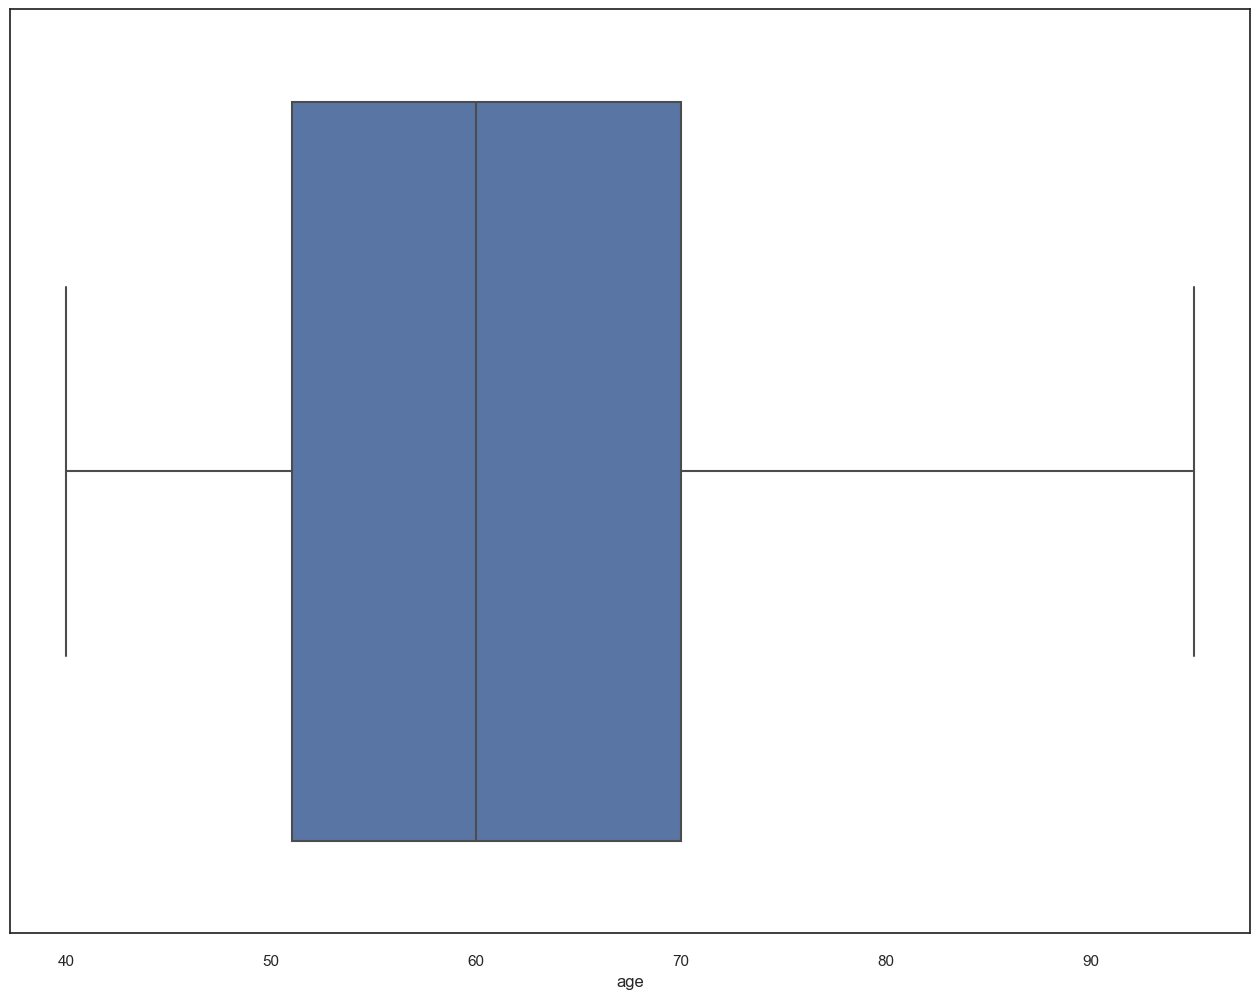

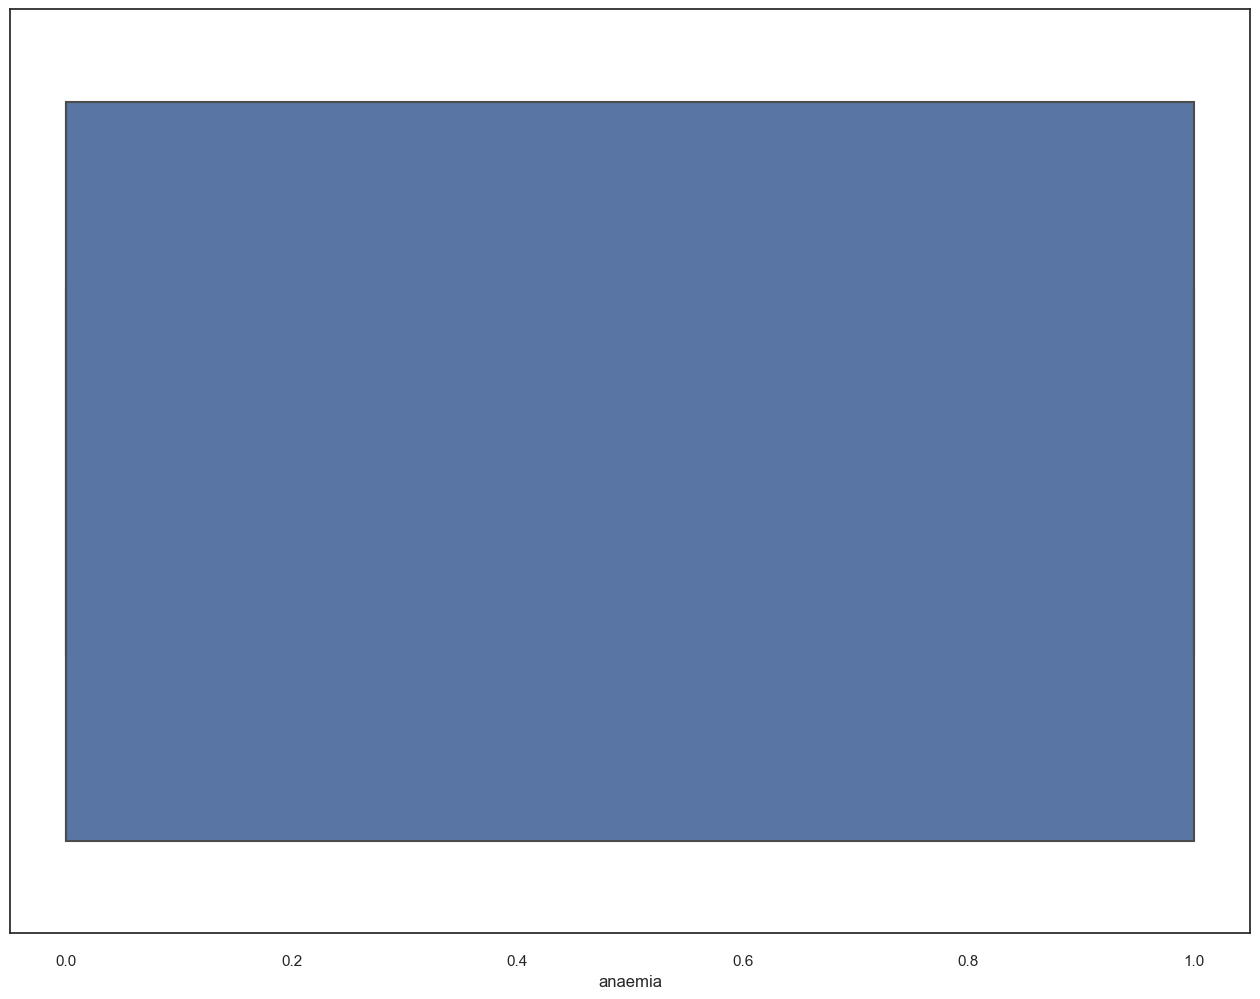

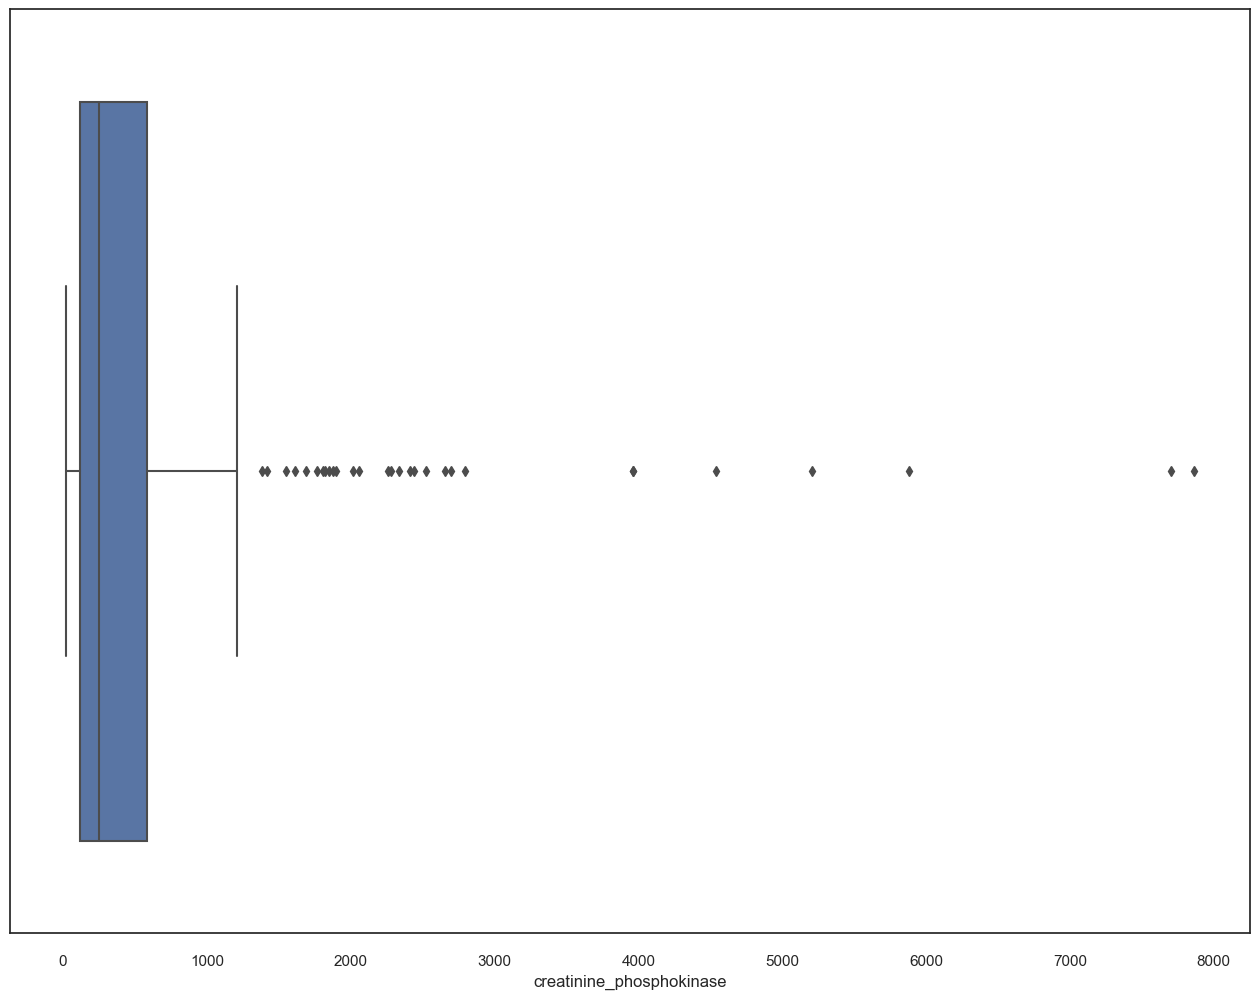

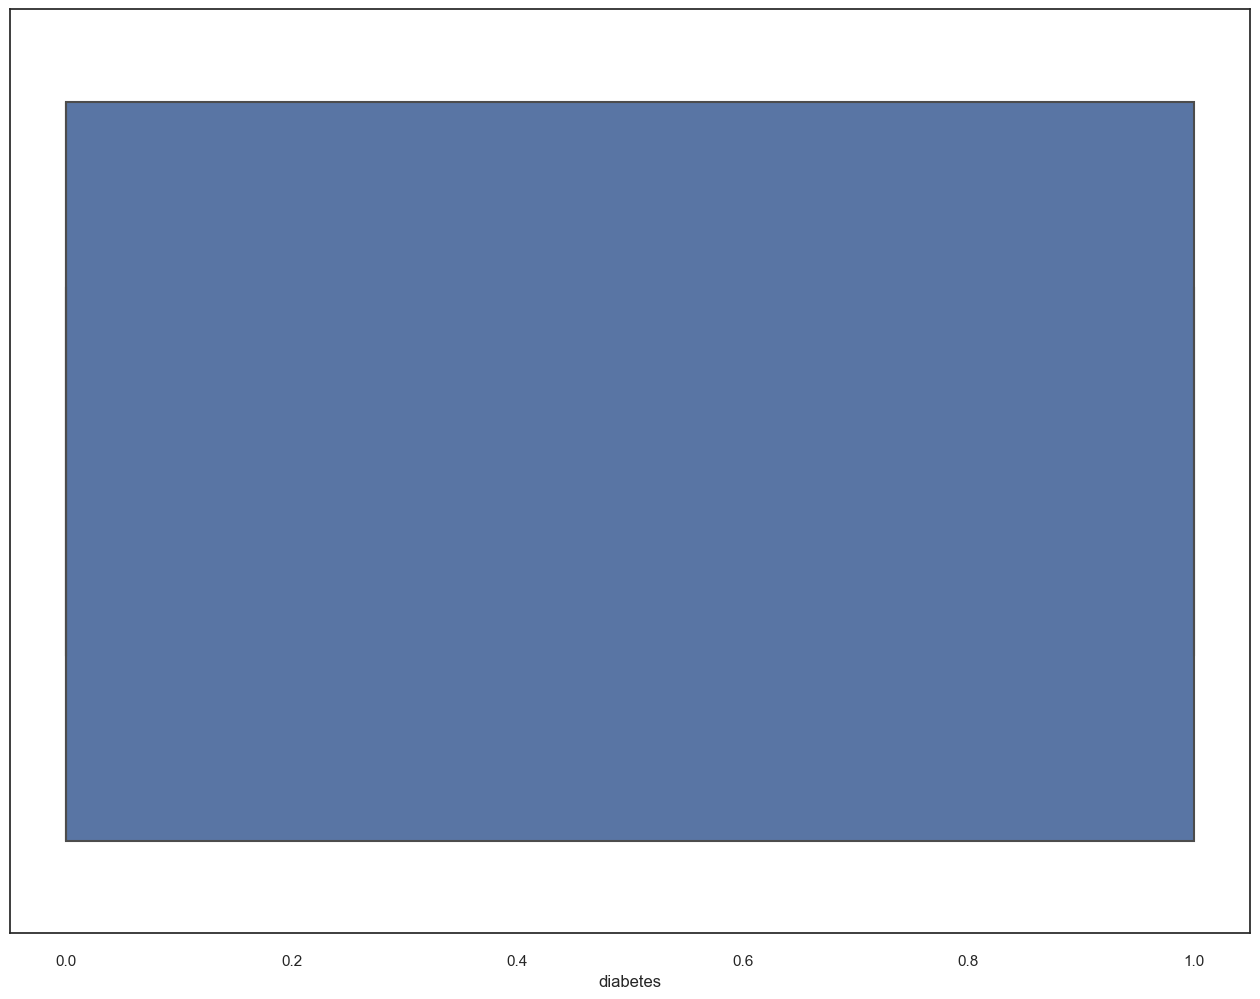

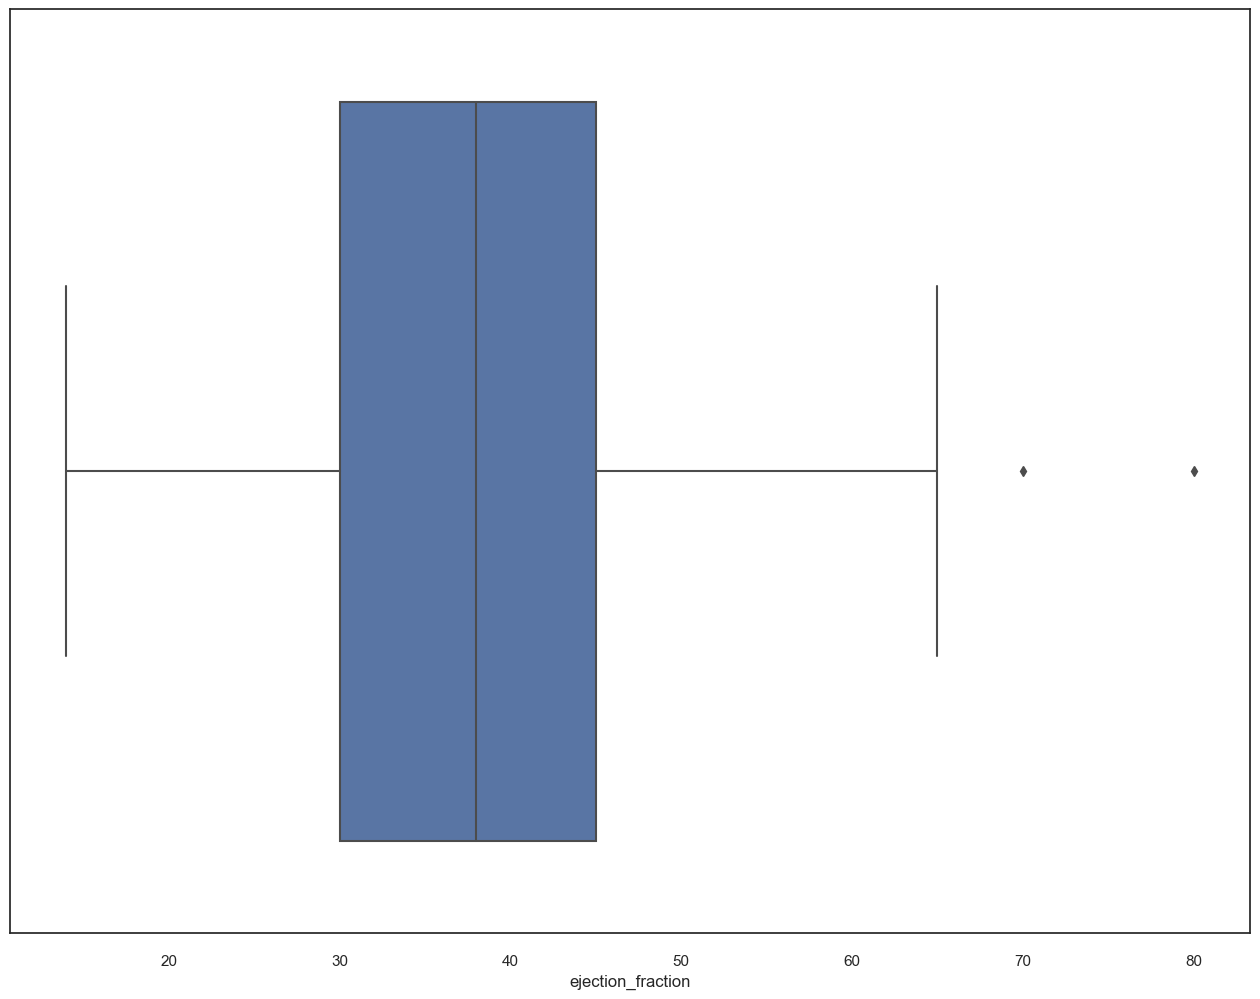

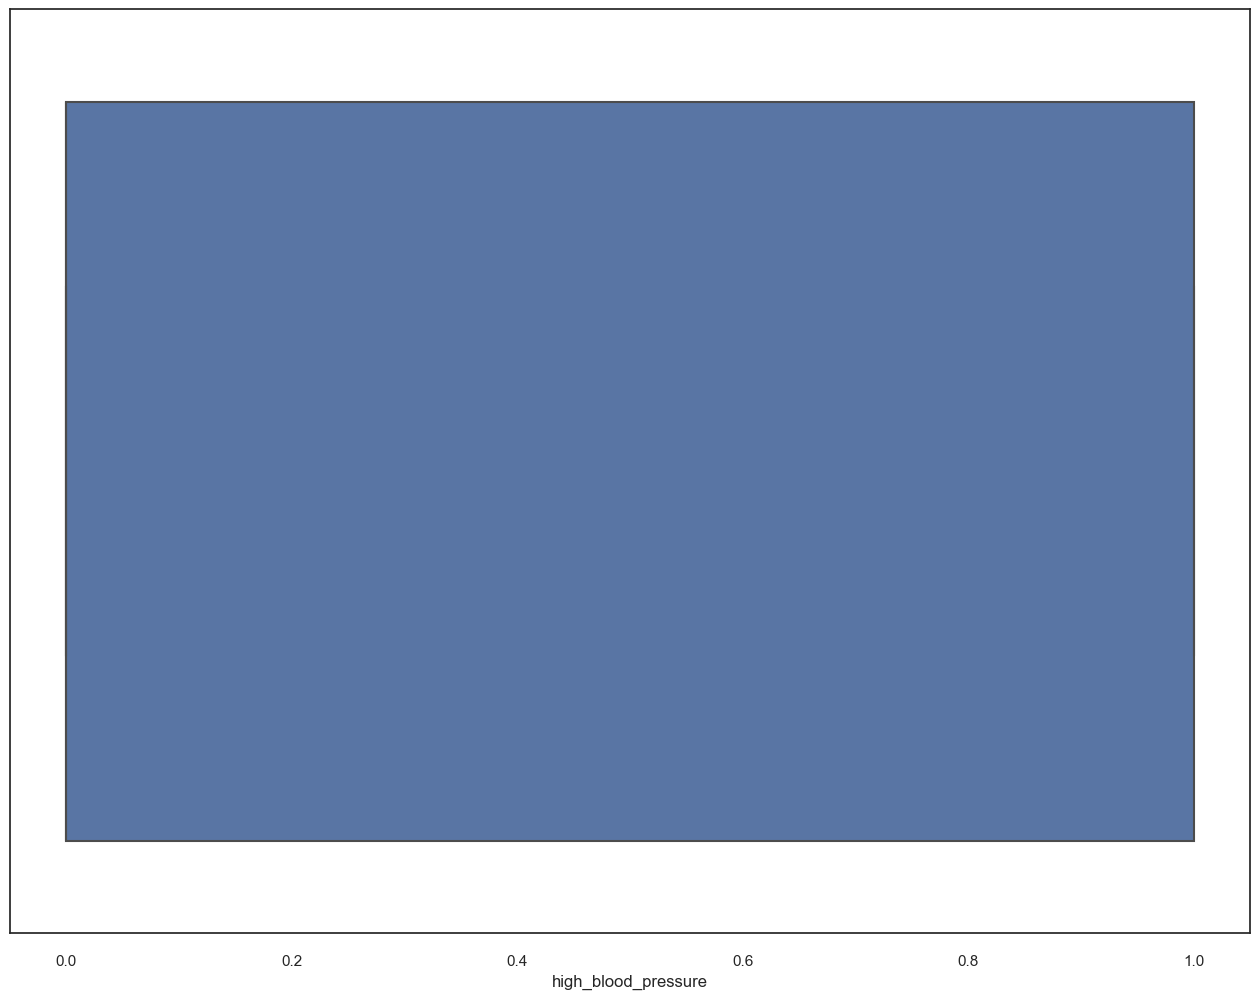

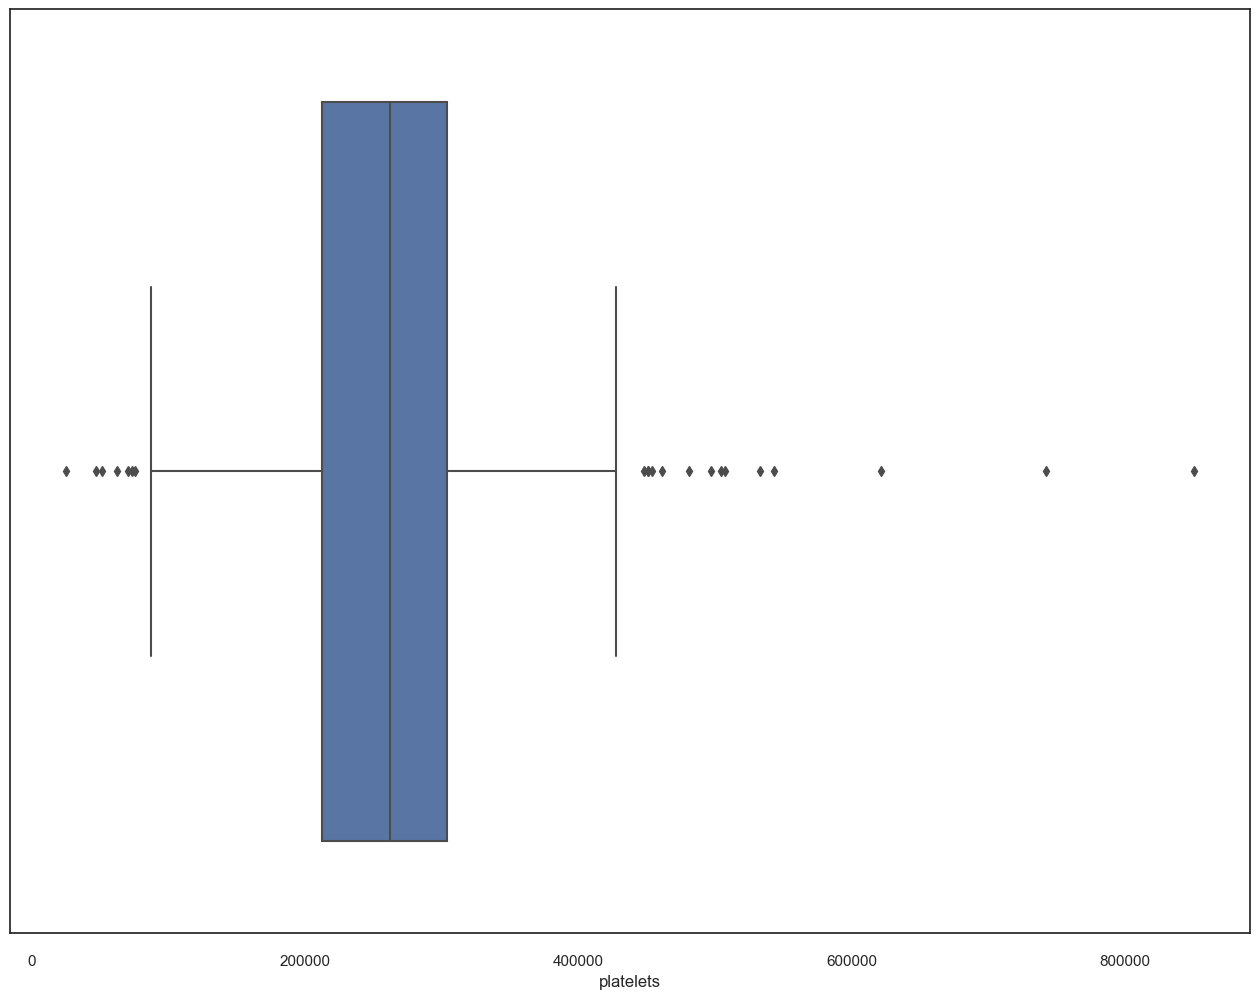

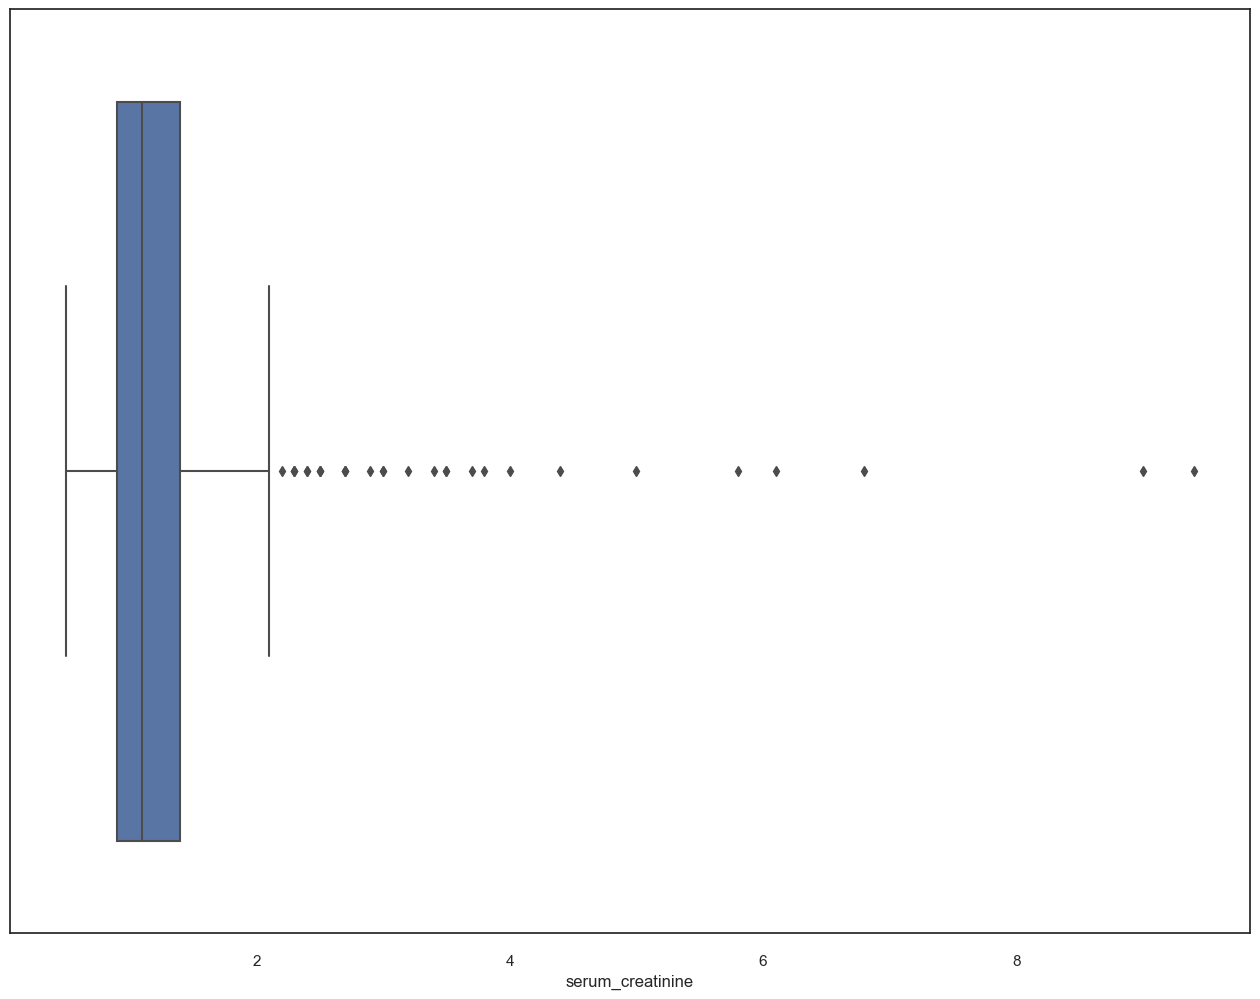

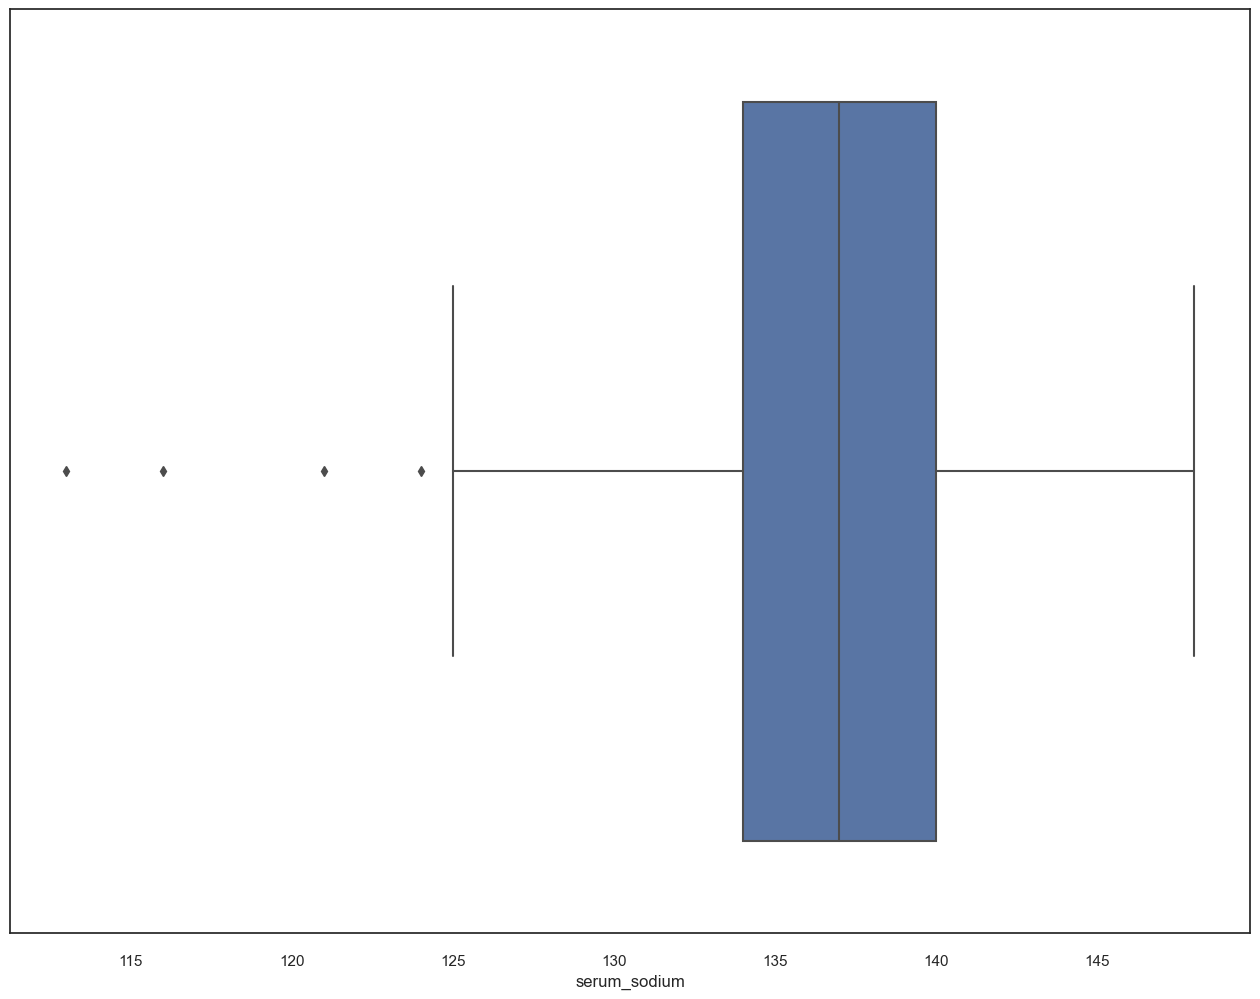

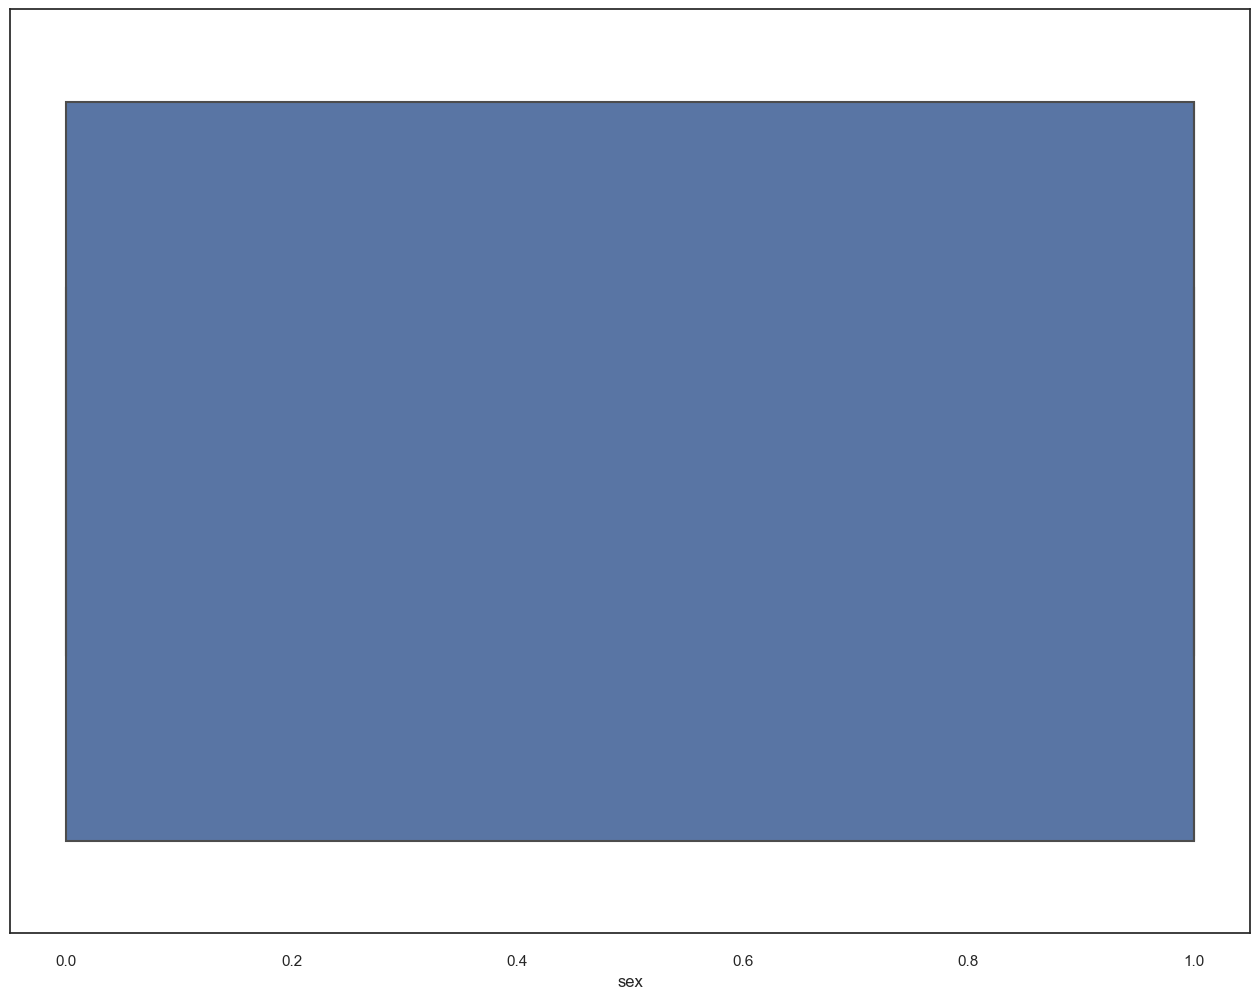

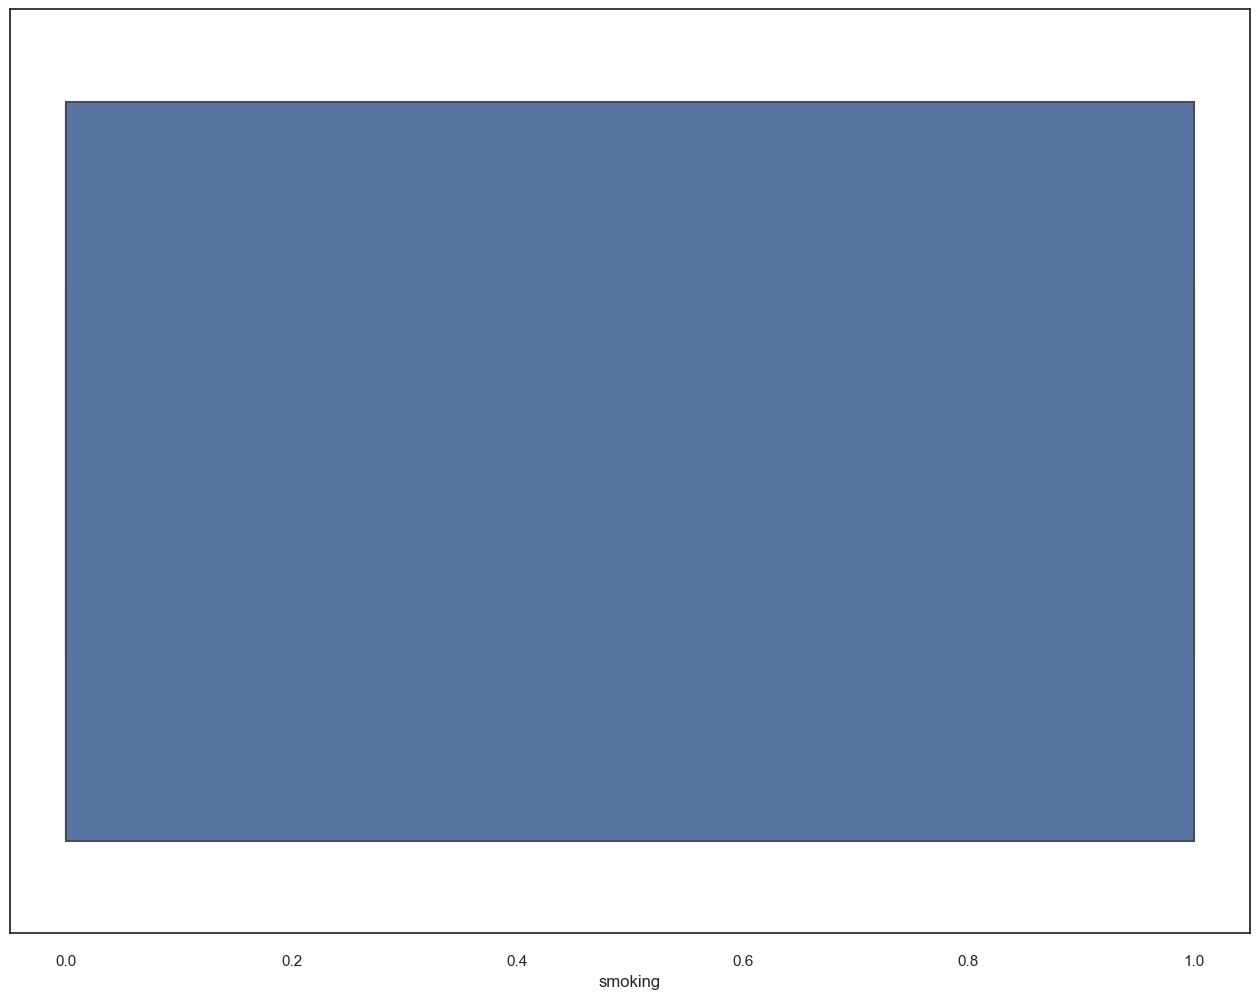

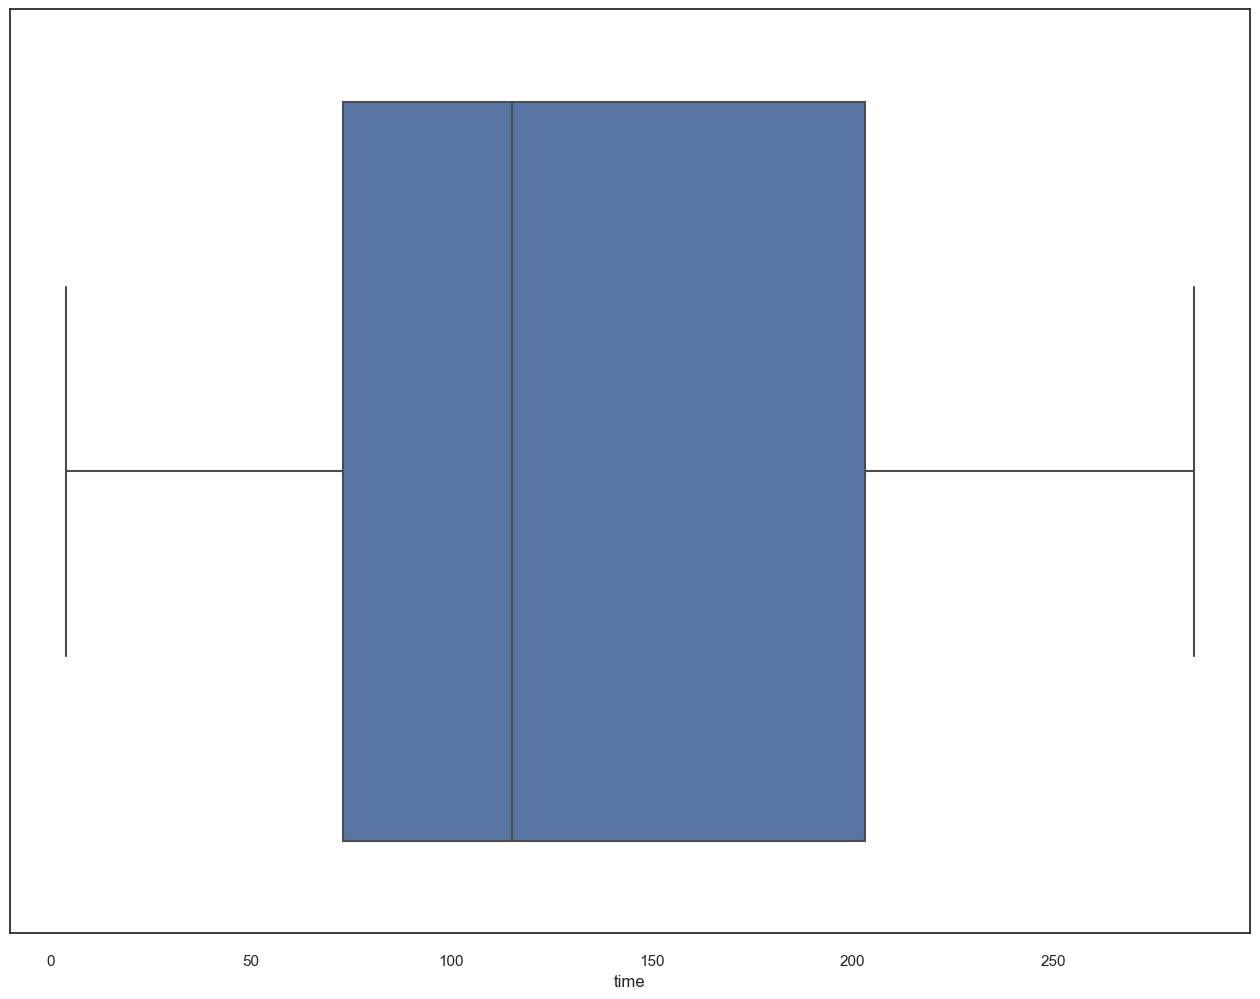

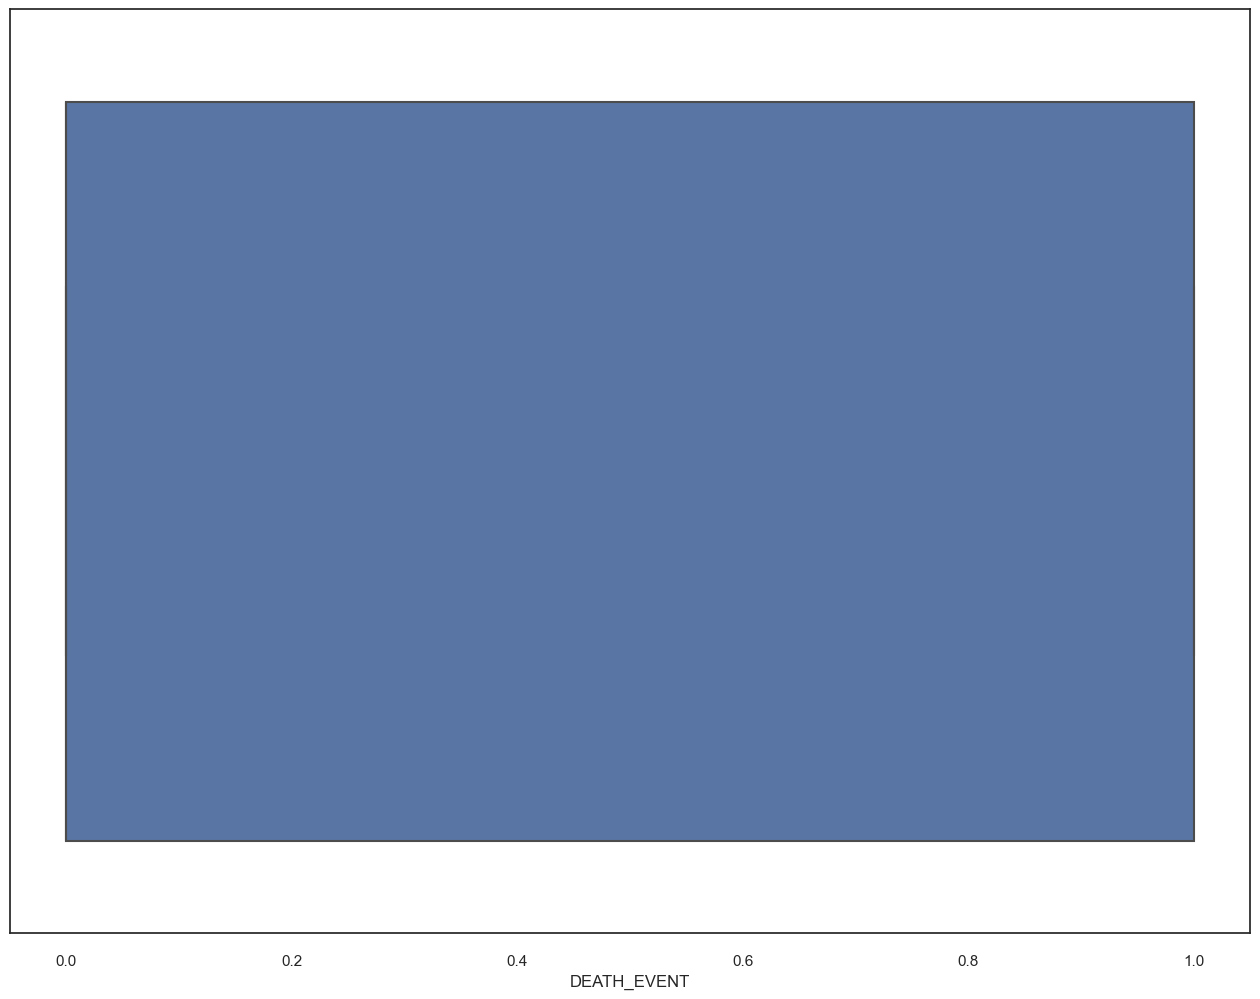

In [115]:
for col in df_HeartFailure.columns:
    plt.figure()
    sns.boxplot(x=df_HeartFailure[col])
plt.show()

### Mengatasi Outliers

In [116]:
for x in df_HeartFailure.columns:
    Q1,Q3 = np.percentile(df_HeartFailure.loc[:,x], [25, 75])
    IQR = Q3-Q1
    
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)

    df_HeartFailure.loc[df_HeartFailure[x] < lower_bound, x] = np.nan
    df_HeartFailure.loc[df_HeartFailure[x] > upper_bound, x] = np.nan

In [117]:
df_HeartFailure.isnull().sum()
median = df_HeartFailure.median()
df_HeartFailure.fillna(median,inplace=True)

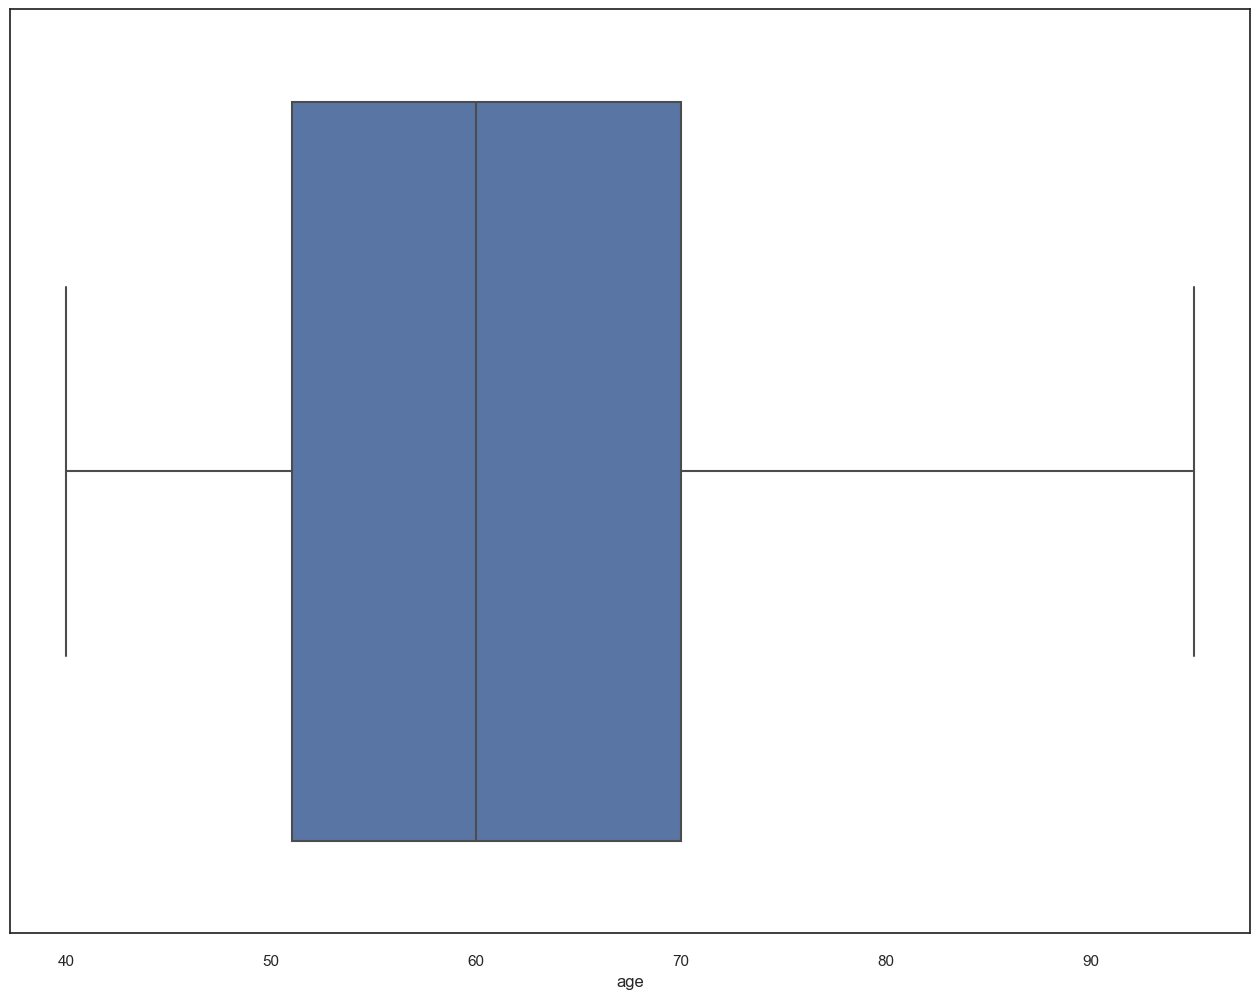

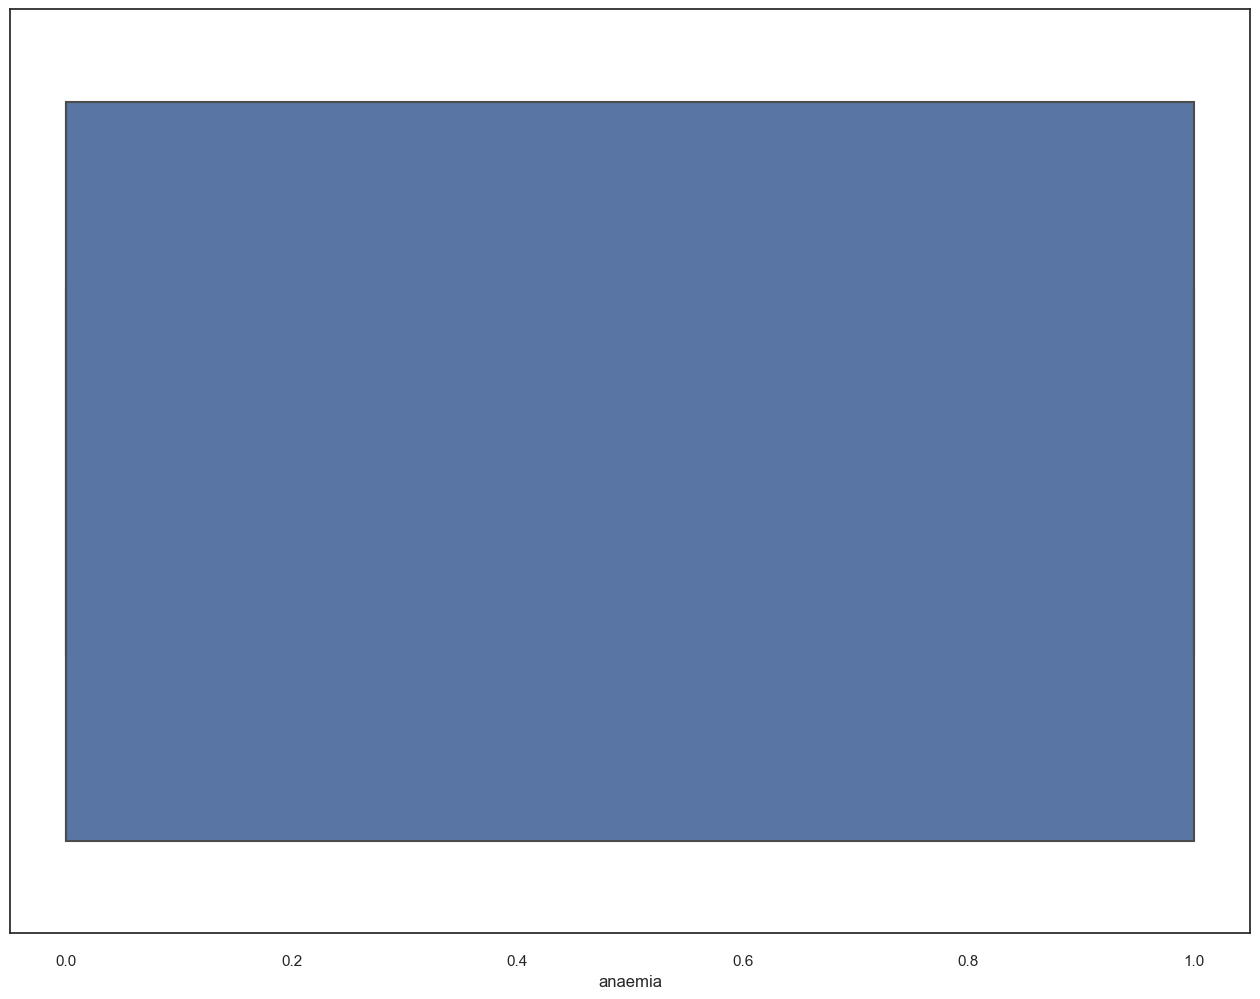

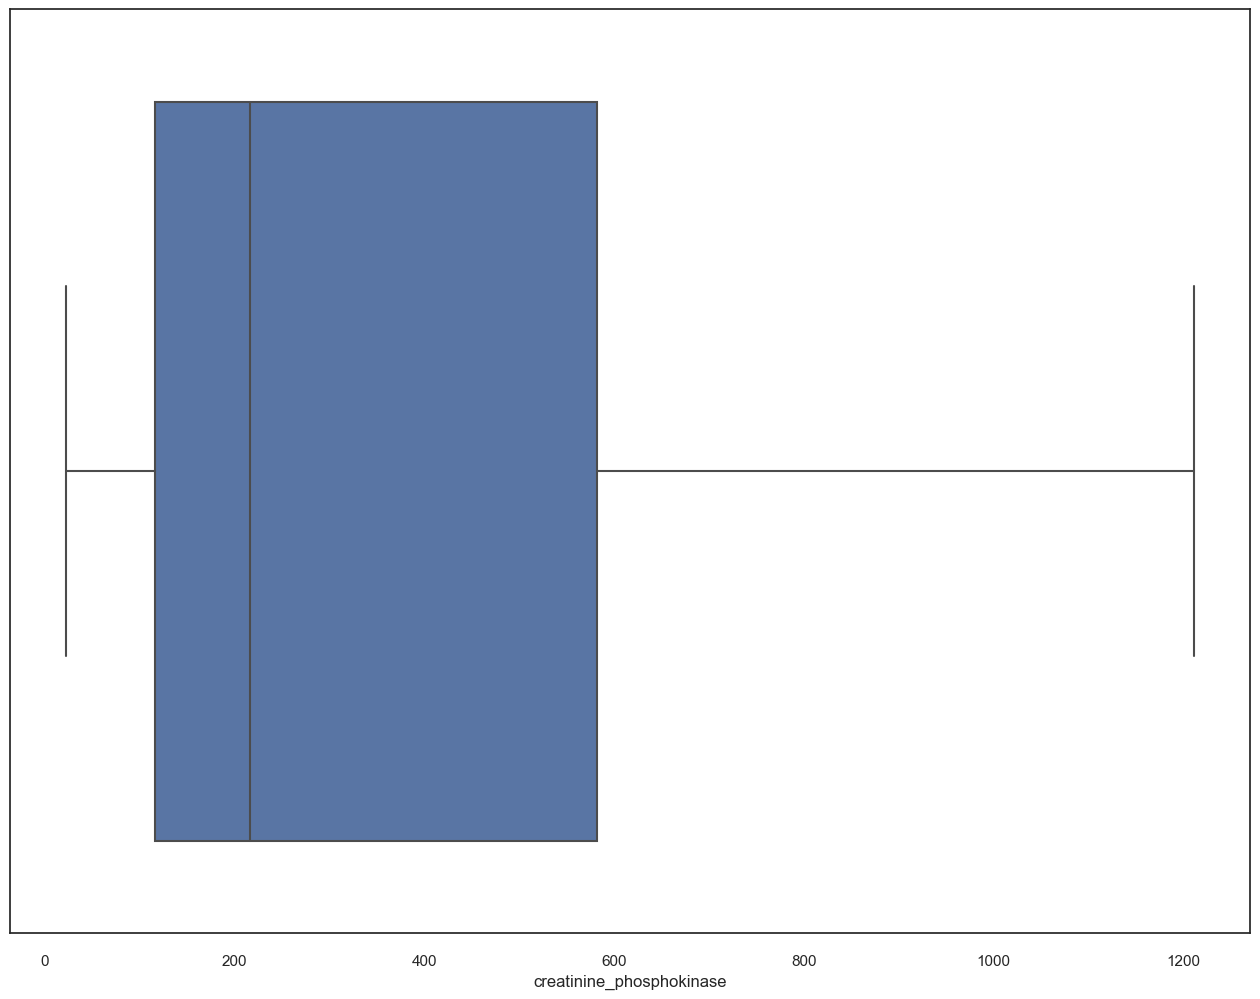

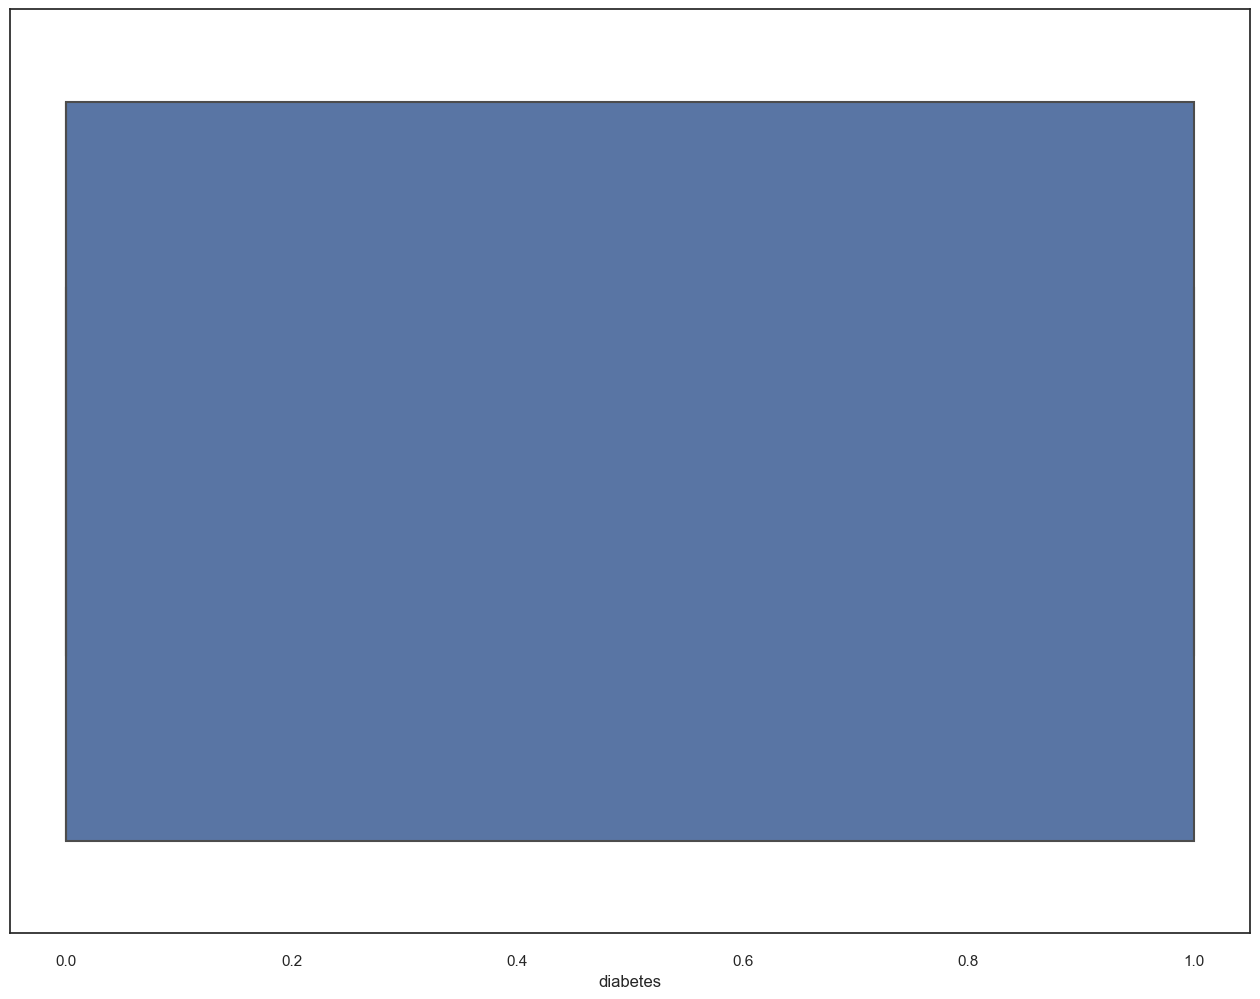

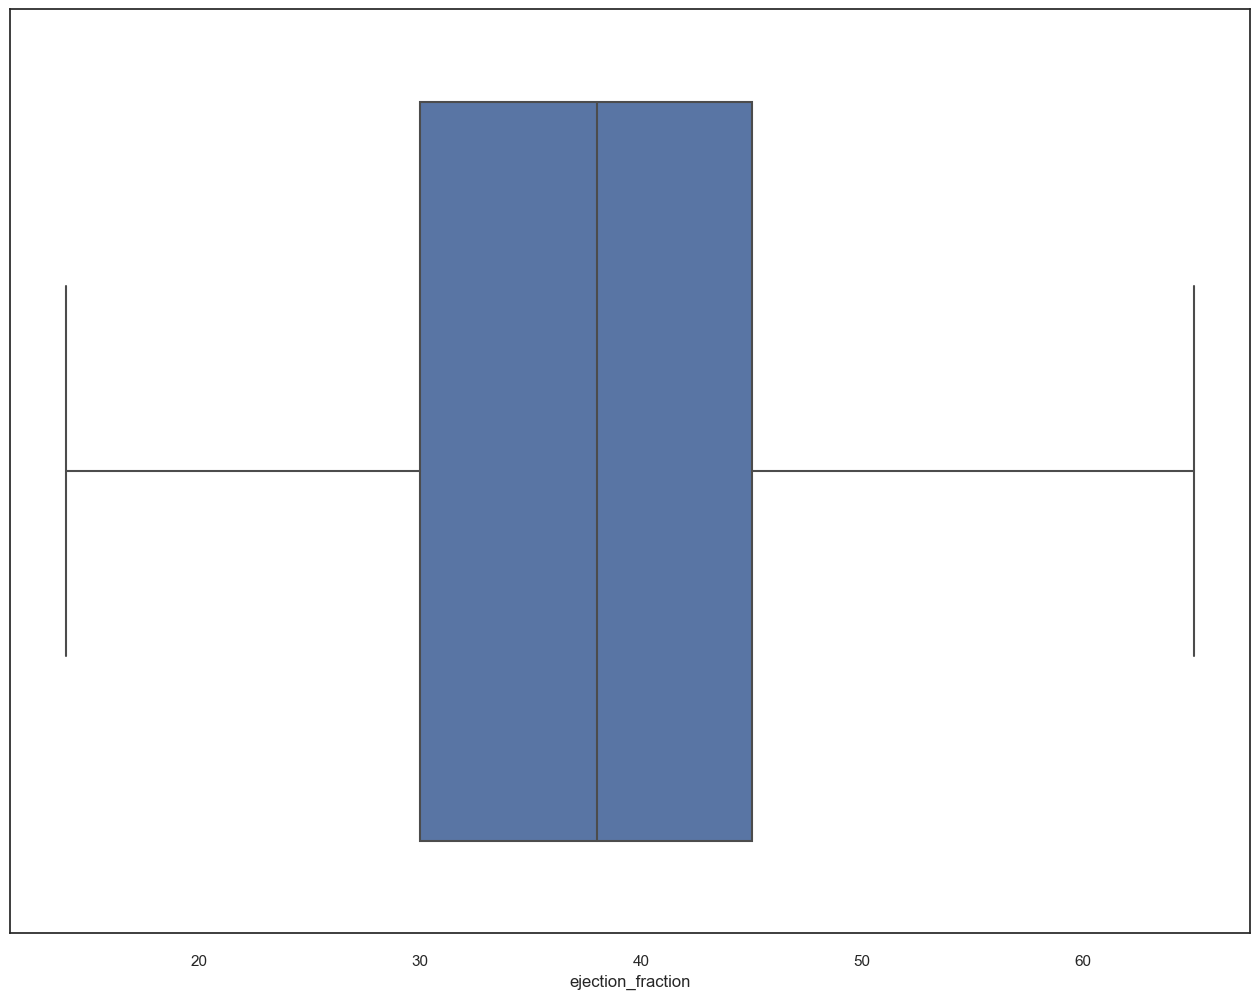

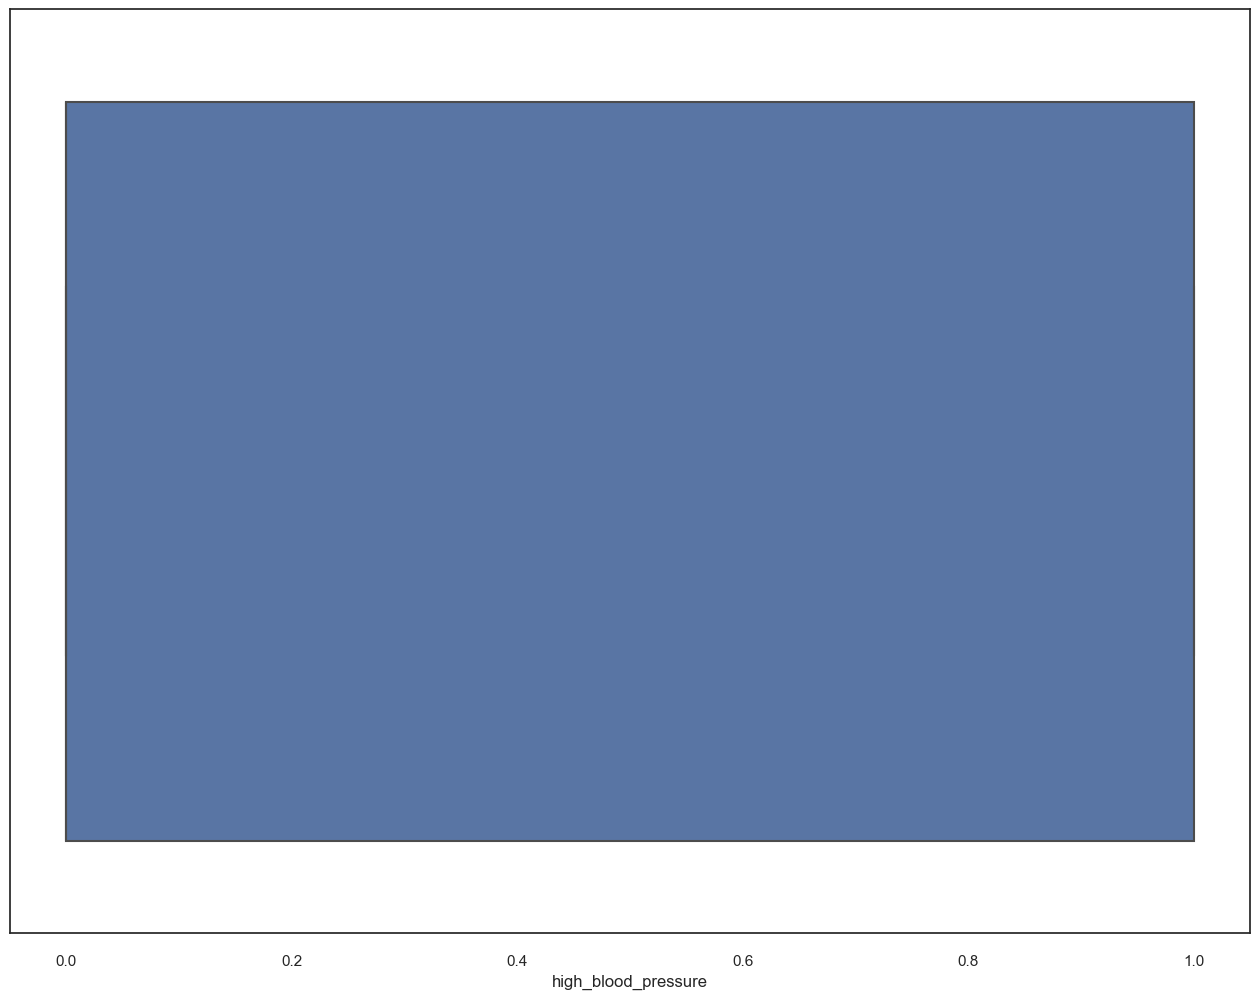

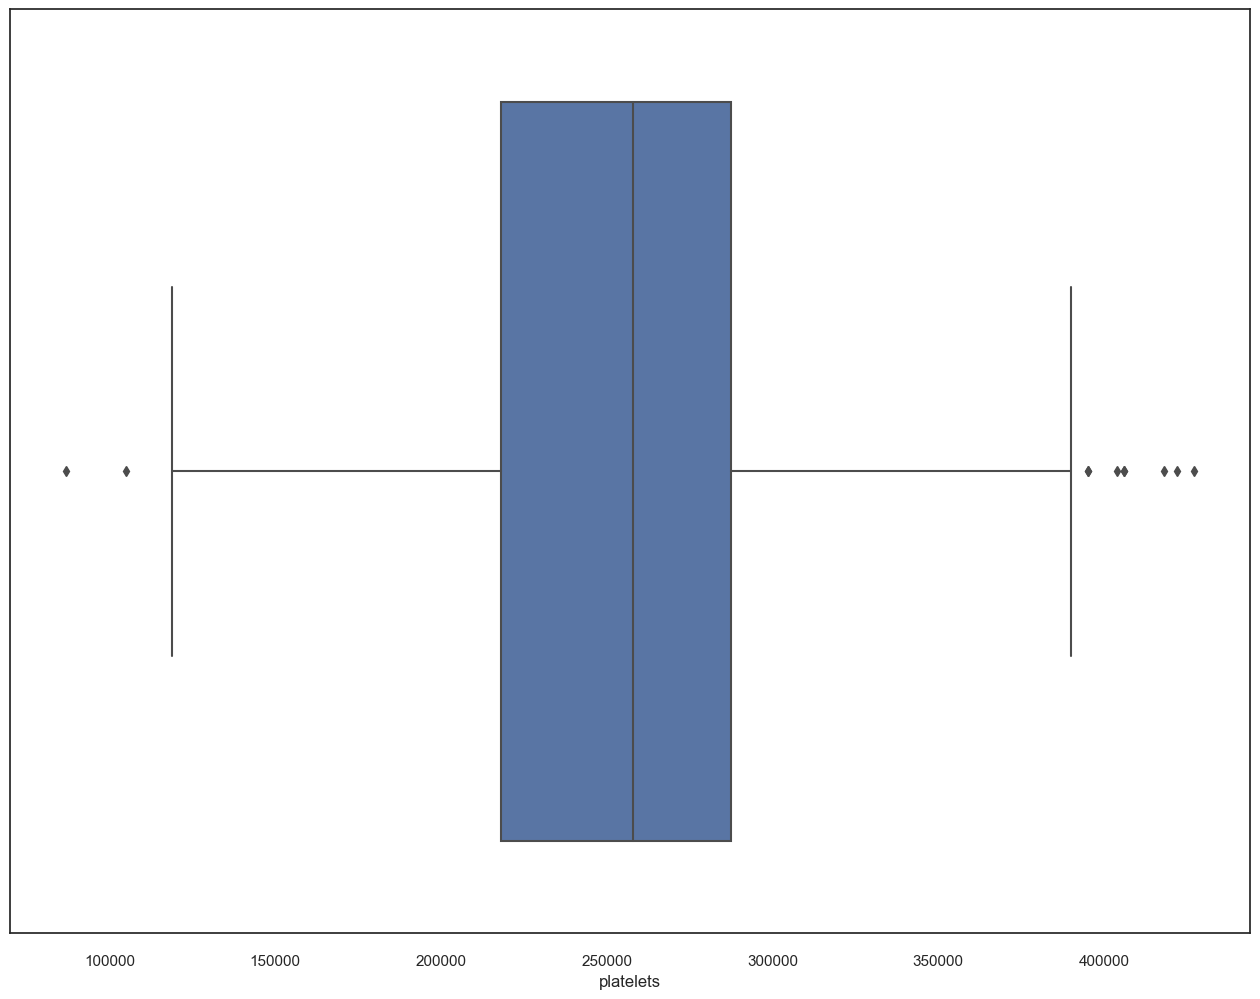

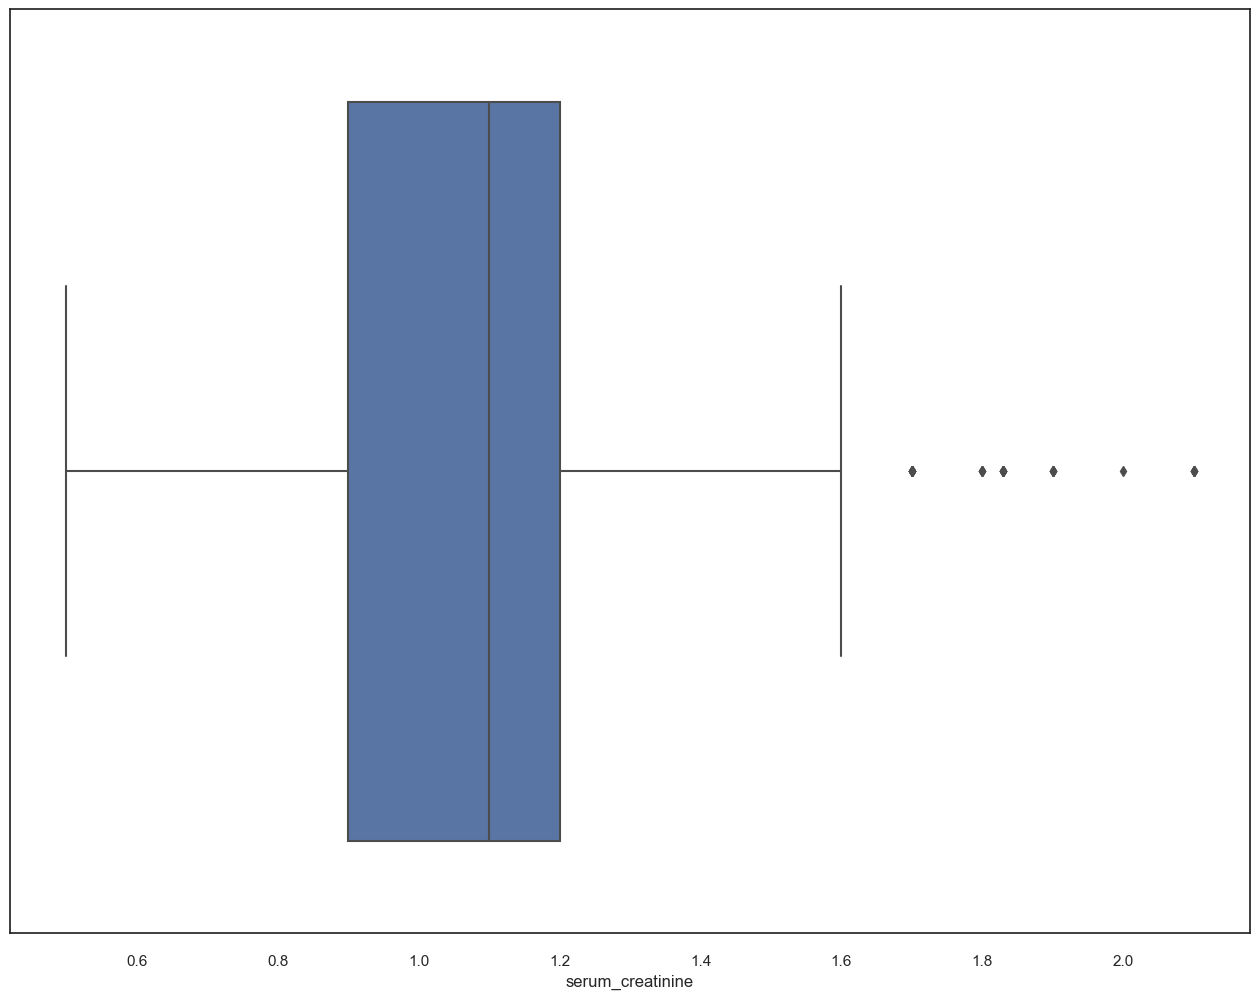

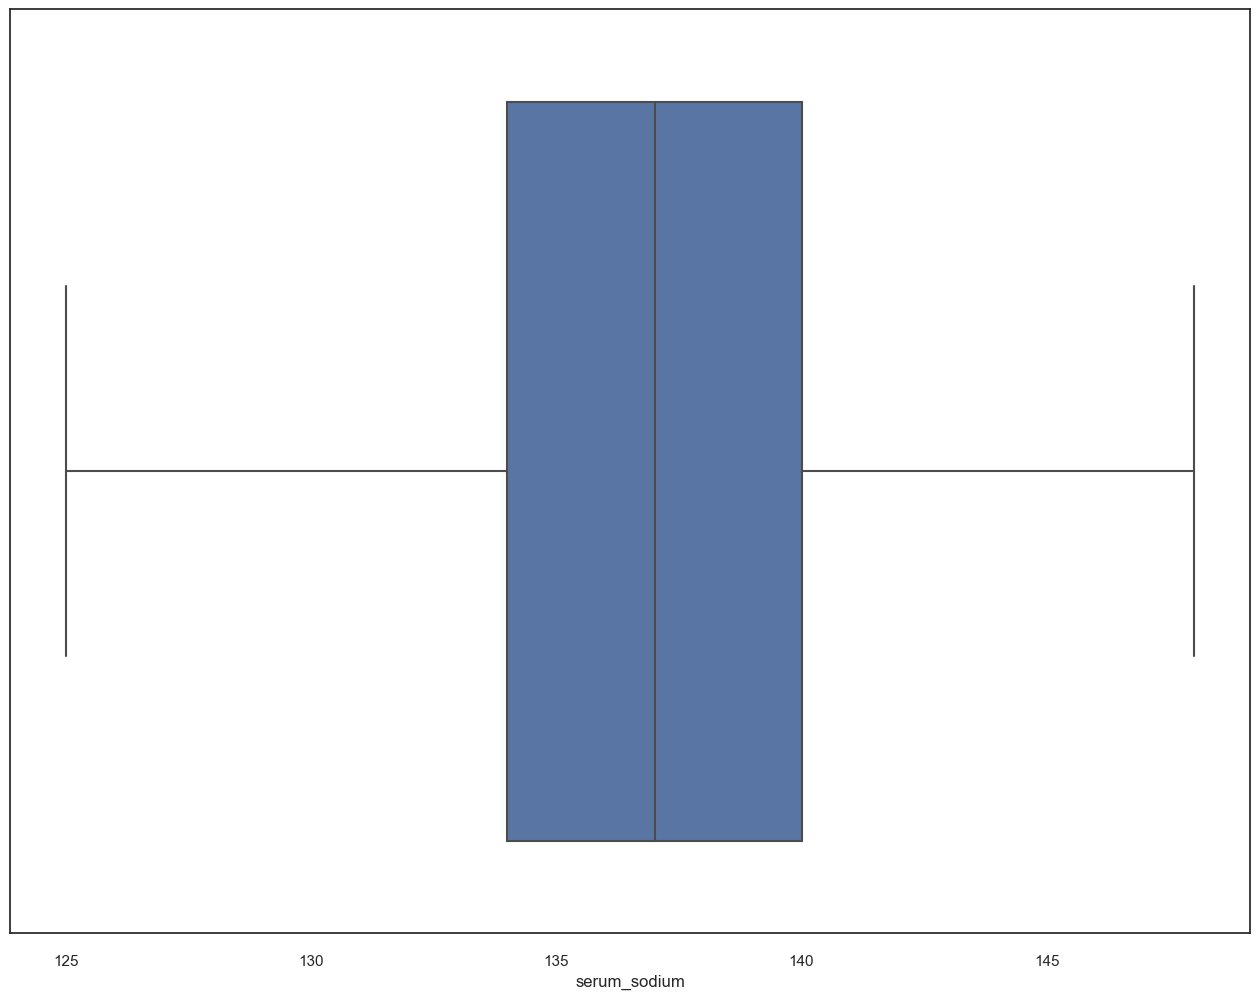

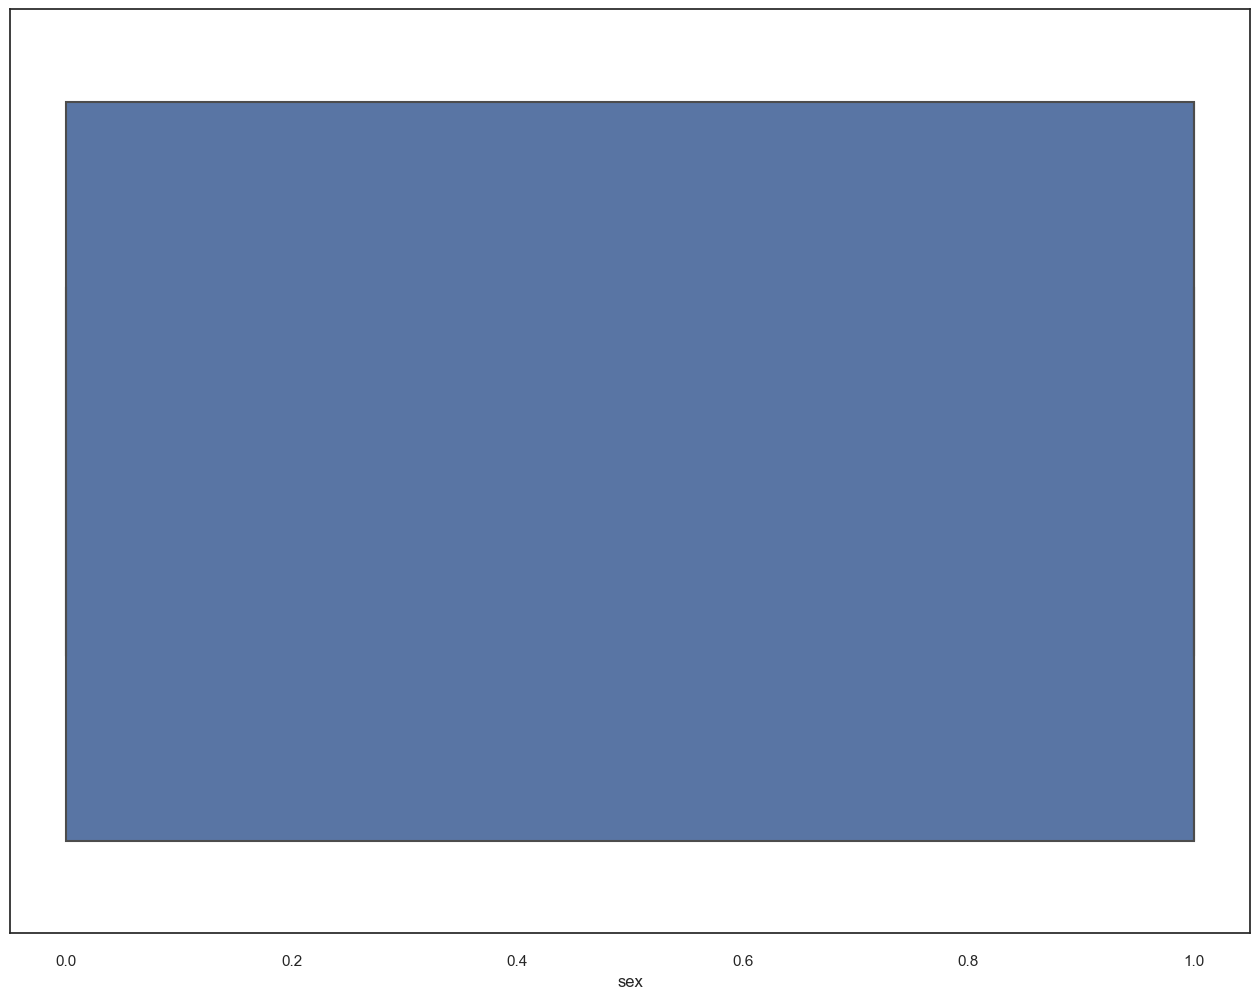

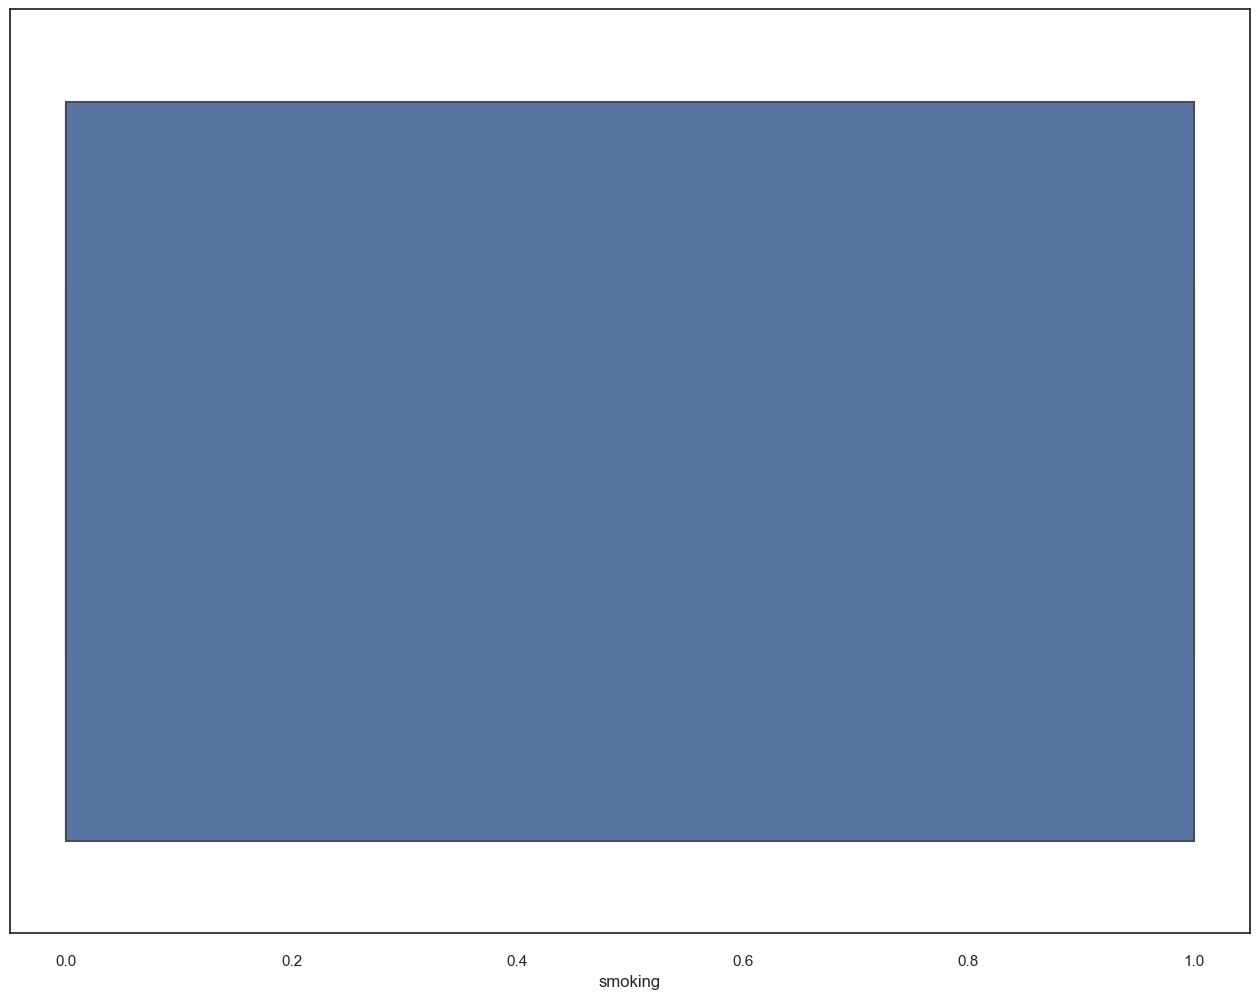

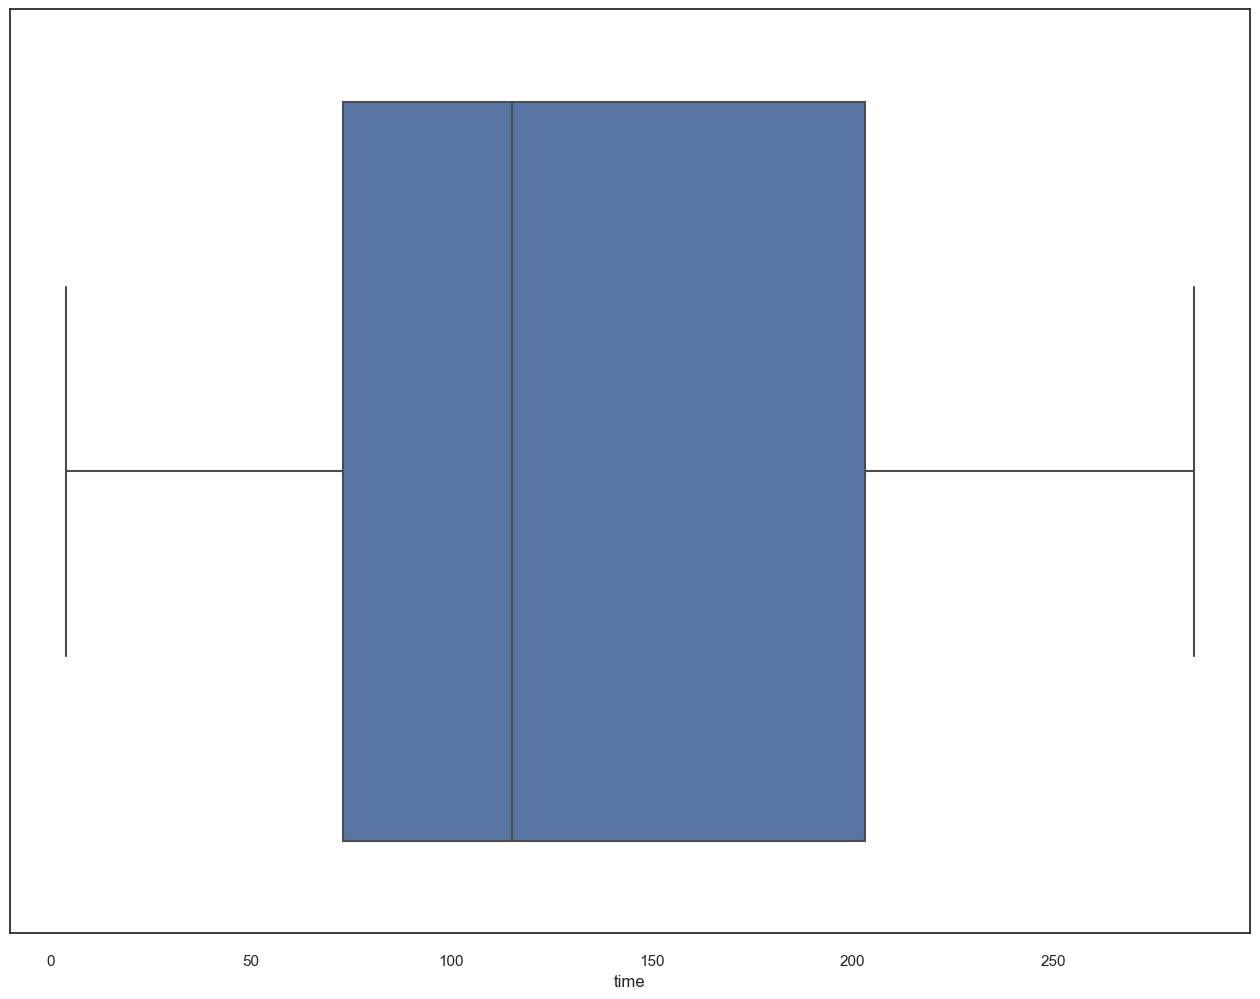

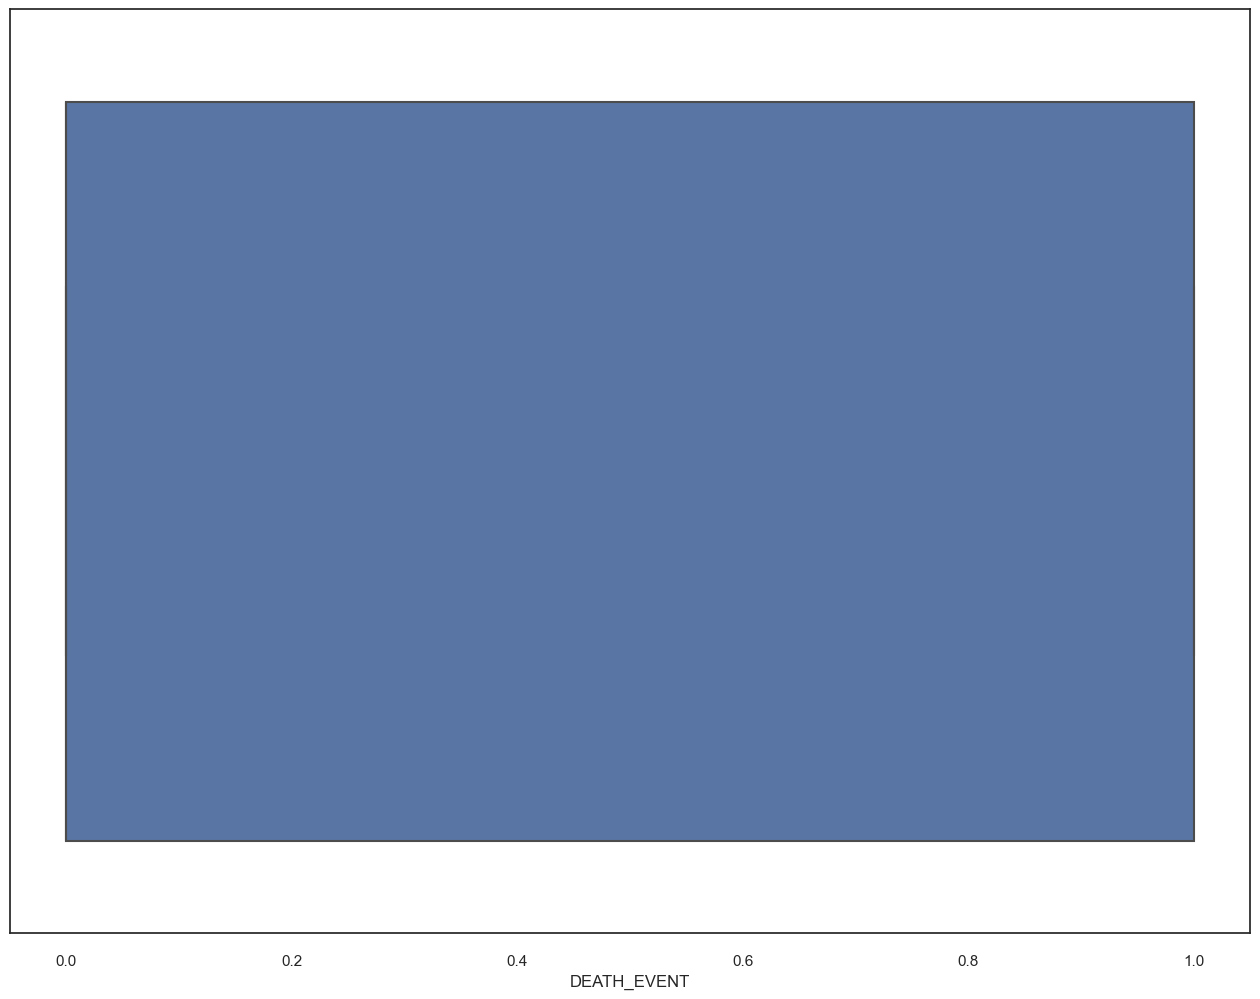

In [118]:
for col in df_HeartFailure.columns:
    plt.figure()
    sns.boxplot(x=df_HeartFailure[col])
plt.show()

In [119]:
df_HeartFailure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,321.041806,0.418060,37.836120,0.351171,254902.845318,1.132676,136.872910,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,266.039709,0.494067,11.431877,0.478136,65545.455163,0.321682,3.841303,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,87000.000000,0.500000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,218000.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,216.500000,0.000000,38.000000,0.000000,258000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,287500.000000,1.200000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1211.000000,1.000000,65.000000,1.000000,427000.000000,2.100000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory Data Analysis

In [120]:
continuous_data = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_data = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

df_HeartFailure[continuous_data].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.829431,321.041806,37.836120,254902.845318,1.132676,136.872910,130.260870
std,11.894997,266.039709,11.431877,65545.455163,0.321682,3.841303,77.614208
min,40.000000,23.000000,14.000000,87000.000000,0.500000,125.000000,4.000000
25%,51.000000,116.500000,30.000000,218000.000000,0.900000,134.000000,73.000000
50%,60.000000,216.500000,38.000000,258000.000000,1.100000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,287500.000000,1.200000,140.000000,203.000000
max,95.000000,1211.000000,65.000000,427000.000000,2.100000,148.000000,285.000000


### Distribusi Usia Pasien

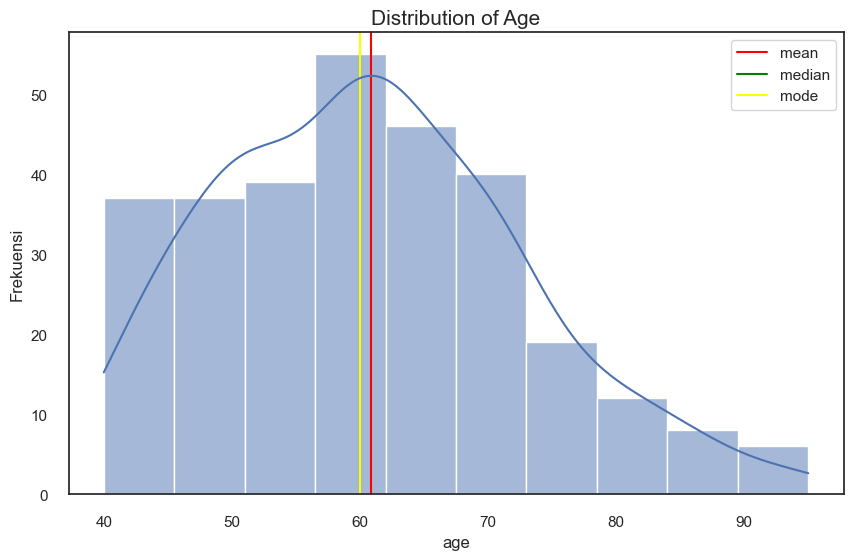

In [121]:
plt.figure(figsize = (10, 6))
plt.title("Distribution of Age", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_HeartFailure['age'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_HeartFailure['age'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_HeartFailure['age'].mode()[0], color = 'yellow', label = 'mode')
sns.histplot(df_HeartFailure['age'], kde=True)
plt.legend()

### Jumlah Pasien Meninggal

In [122]:
yes = len(df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1])
no = len(df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0])

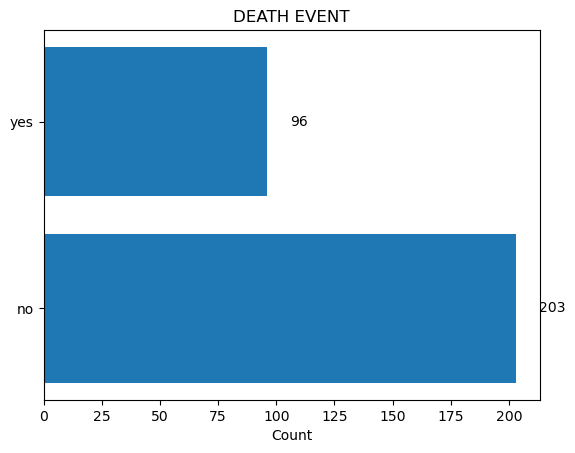

In [123]:
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('yes', 'no')
y_total = np.arange(len(y))
x = (yes, no)
ax.barh(y_total, x, align='center')
ax.set_yticks(y_total)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('DEATH EVENT')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

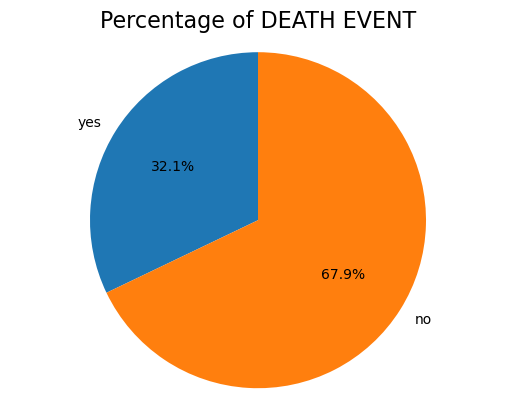

In [124]:
y = ('yes', 'no')
y_total = np.arange(len(y))
x = (yes, no)
labels = 'yes', 'no'
sizes = [yes, no]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')
plt.title('Percentage of DEATH EVENT', size=16)
plt.show()

### Distribusi Pasien Meninggal Berdasarkan Gender (Sex)

In [125]:
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

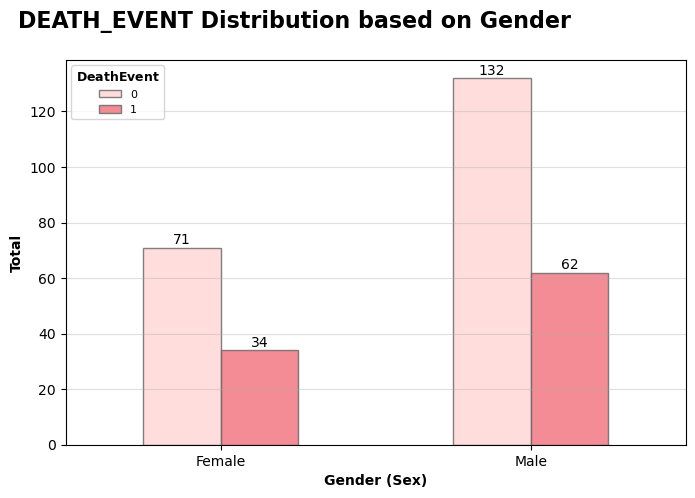

In [126]:
# Set Label
labels = ['0', '1']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# Bar Chart
ax = pd.crosstab(df_HeartFailure.sex, df_HeartFailure.DEATH_EVENT).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# Set Bar Chart
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('DEATH_EVENT Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Death Event}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

### Distribusi Pasien Penderita Anemia

In [127]:
fig = px.pie(df_HeartFailure, names='anaemia', height=400, width= 400, color_discrete_sequence=px.colors.sequential.Blues_r,  title='Anaemia')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Distribusi Pasien Penderita Diabetes

In [128]:
fig = px.pie(df_HeartFailure, names='diabetes', height=400, width= 400, color_discrete_sequence=px.colors.sequential.Blues_r,  title='Diabetes')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Distribusi Pasien Meninggal Berdasarkan Umur

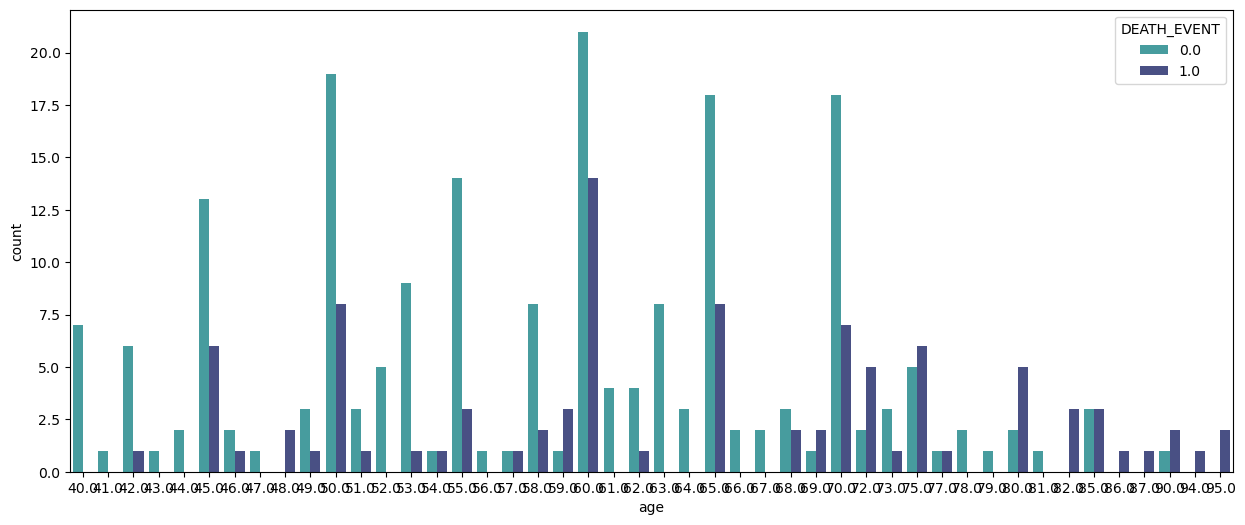

In [129]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df_HeartFailure, hue = 'DEATH_EVENT',palette='mako_r')
plt.show()

### Ejection Fraction

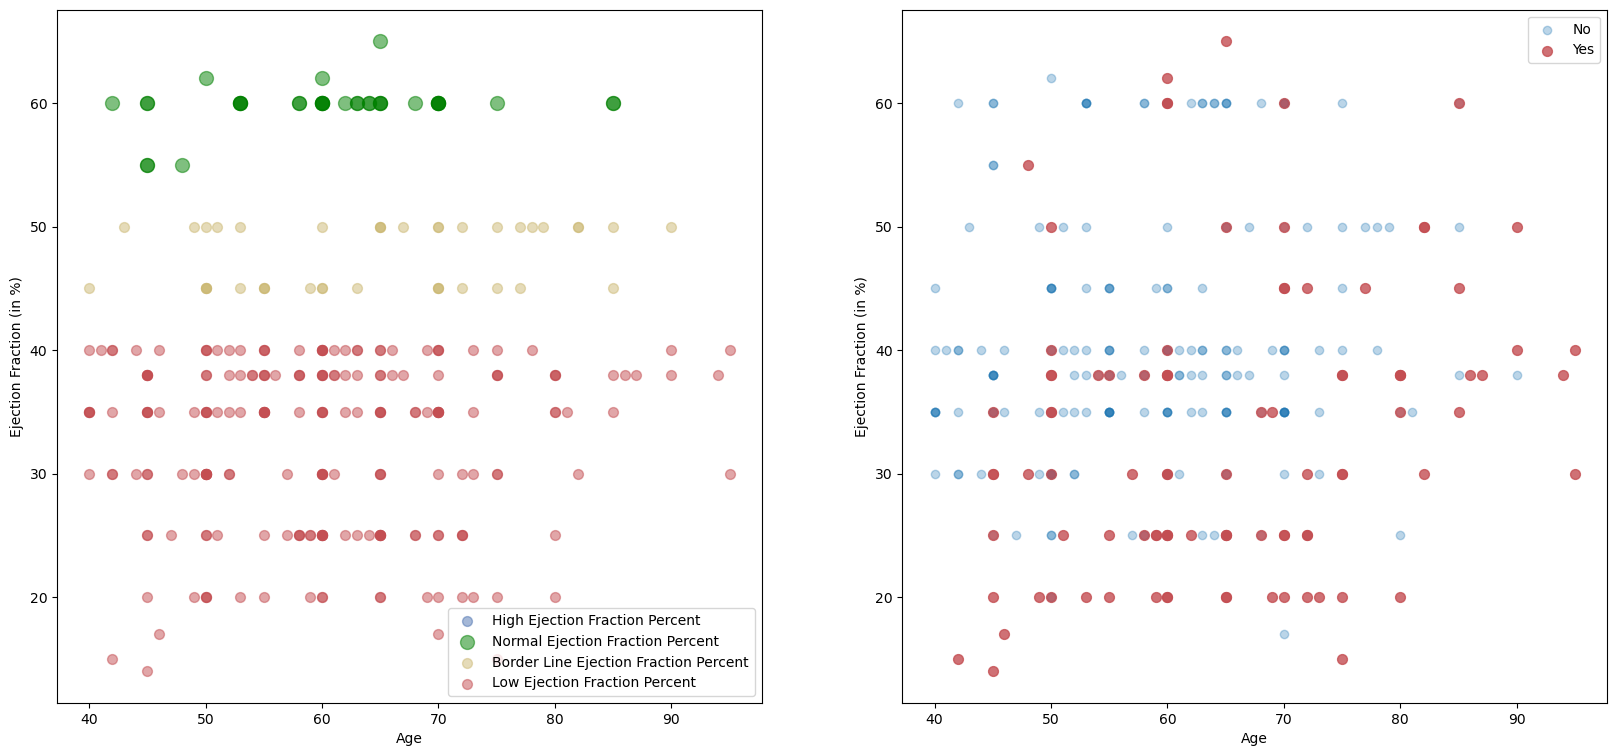

In [130]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''Fraksi ejeksi normal antara 50% sampai 75%, berdasarkan dari American Heart Association'''
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] > 75)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'High Ejection Fraction Percent')
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] <= 75) & (df_HeartFailure['ejection_fraction'] > 50 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal Ejection Fraction Percent')

'''Garis peningkatan fraksi ejeksi bisa dalam rentang antara 41% dan 50%'''
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] <= 50 ) & (df_HeartFailure['ejection_fraction'] >= 41)] , 
            color = 'y' , s = 50 , alpha = 0.5 , label = 'Border Line Ejection Fraction Percent')
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] <= 40 )] , color = 'r' , s = 50 , alpha = 0.5 , 
           label = 'Low Ejection Fraction Percent')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (in %)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0 ] , label = 'No' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1 ] , label = 'Yes' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (in %)')
plt.legend()

plt.show()

In [131]:
df = pd.DataFrame(df_HeartFailure)
df.query('ejection_fraction <= 75' and 'ejection_fraction >50')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
7,60.0,1.0,315.0,1.0,60.0,0.0,258000.00,1.10,131.0,1.0,1.0,10.0,1.0
8,65.0,0.0,157.0,0.0,65.0,0.0,263358.03,1.50,138.0,0.0,0.0,10.0,1.0
19,48.0,1.0,582.0,1.0,55.0,0.0,87000.00,1.90,137.0,0.0,0.0,15.0,1.0
23,53.0,0.0,63.0,1.0,60.0,0.0,368000.00,0.80,135.0,1.0,0.0,22.0,0.0
44,60.0,1.0,588.0,1.0,60.0,0.0,194000.00,1.10,142.0,0.0,0.0,33.0,1.0
52,60.0,0.0,216.5,1.0,62.0,0.0,263358.03,1.10,146.0,0.0,0.0,43.0,1.0
76,70.0,0.0,92.0,0.0,60.0,1.0,317000.00,0.80,140.0,0.0,1.0,74.0,0.0
87,65.0,1.0,68.0,1.0,60.0,1.0,304000.00,0.80,140.0,1.0,0.0,79.0,0.0
92,42.0,0.0,582.0,0.0,60.0,0.0,263358.03,1.18,137.0,0.0,0.0,82.0,0.0
95,58.0,1.0,133.0,0.0,60.0,1.0,219000.00,1.00,141.0,1.0,0.0,83.0,0.0


### Platelets

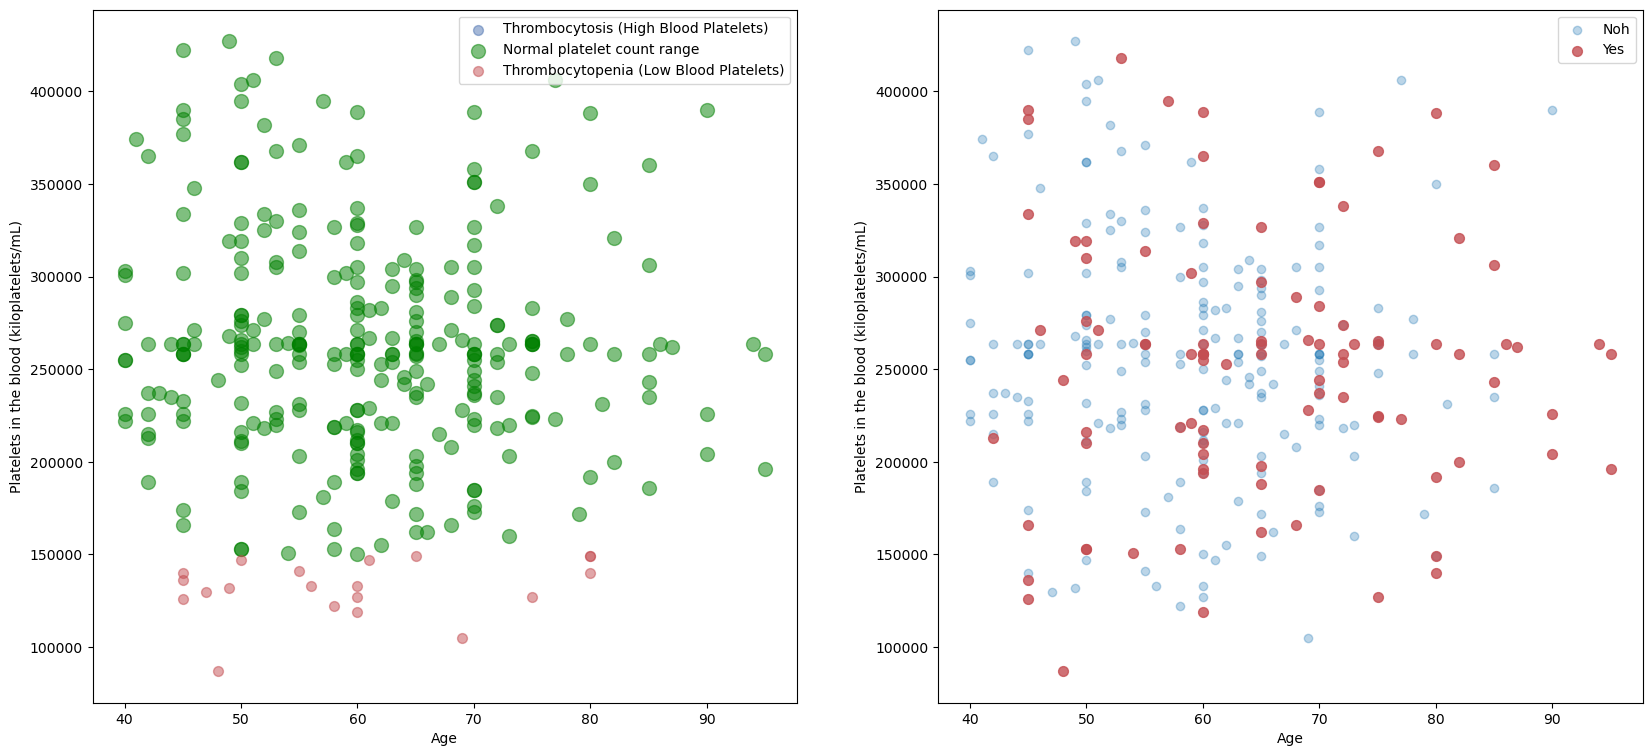

In [132]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''Jumlah trombosit normal berada direntang 150,000 sampai 450,000 trombosit per mikroliter darah.'''
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[(df_HeartFailure['platelets'] > 450001)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'Thrombocytosis (High Blood Platelets)')
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[(df_HeartFailure['platelets'] <= 450000) & (df_HeartFailure['platelets'] >= 150000 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal platelet count range')
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[(df_HeartFailure['platelets'] < 150000 )] , color = 'r' , s = 50 , alpha = 0.5 , 
           label = 'Thrombocytopenia (Low Blood Platelets)')
plt.xlabel('Age')
plt.ylabel('Platelets in the blood (kiloplatelets/mL)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0 ] , label = 'Noh' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1 ] , label = 'Yes' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Platelets in the blood (kiloplatelets/mL)')
plt.legend()

plt.show()

In [133]:
df = pd.DataFrame(df_HeartFailure)
df.query('platelets > 450001')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


### Serum Sodium

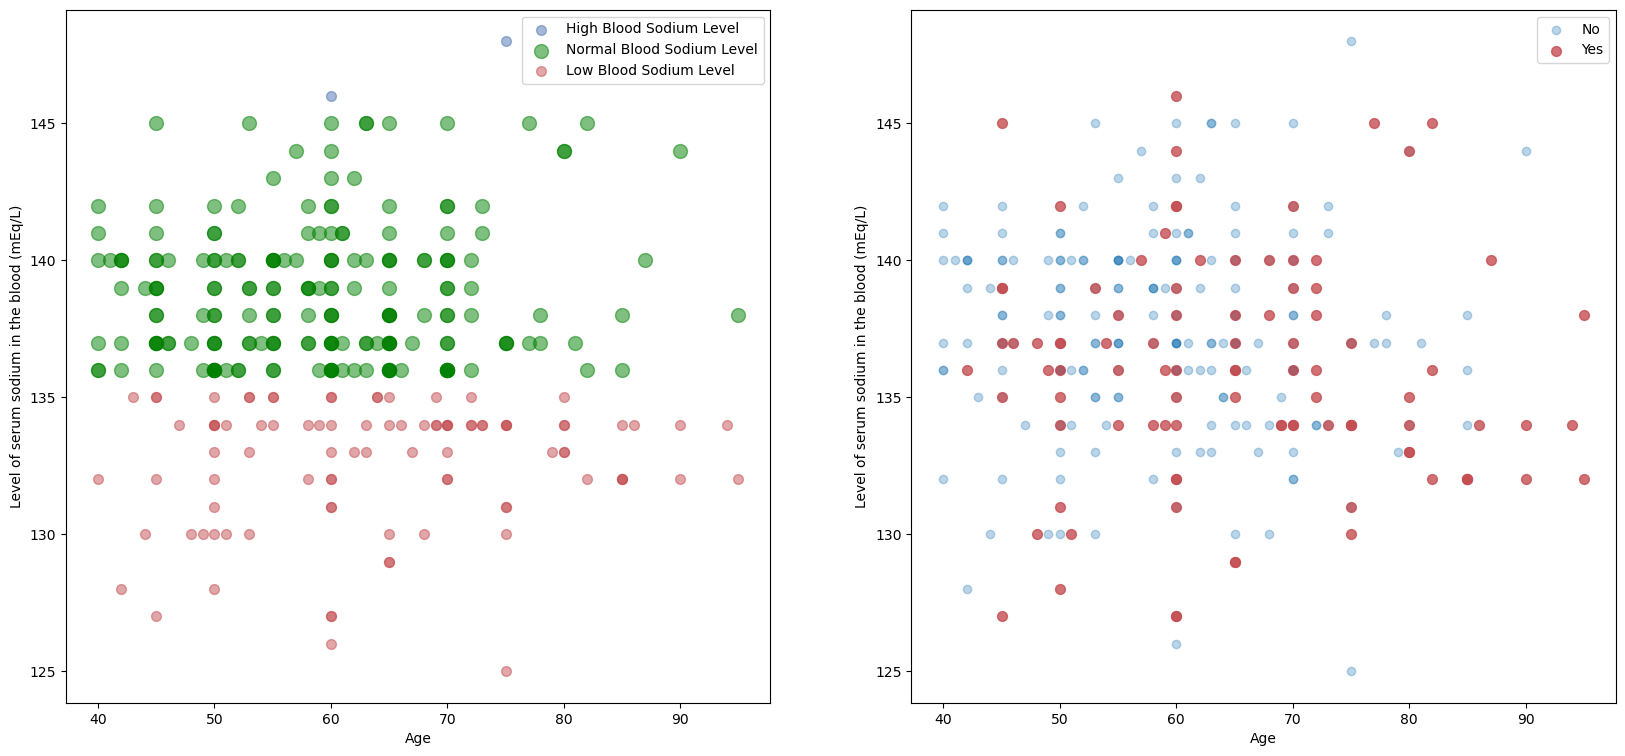

In [134]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''level normal antara 135 sampai 145 mEq/L.'''
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[(df_HeartFailure['serum_sodium'] > 145)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'High Blood Sodium Level ')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[(df_HeartFailure['serum_sodium'] <= 145) & (df_HeartFailure['serum_sodium'] > 135 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal Blood Sodium Level')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[(df_HeartFailure['serum_sodium'] <= 135 )] , 
            color = 'r' , s = 50 , alpha = 0.5 , label = 'Low Blood Sodium Level')

plt.xlabel('Age')
plt.ylabel('Level of serum sodium in the blood (mEq/L)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0 ] , label = 'No' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1 ] , label = 'Yes' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Level of serum sodium in the blood (mEq/L)')
plt.legend()

plt.show()

In [135]:
df = pd.DataFrame(df_HeartFailure)
df.query('serum_sodium > 145')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
52,60.0,0.0,216.5,1.0,62.0,0.0,263358.03,1.1,146.0,0.0,0.0,43.0,1.0
236,75.0,0.0,119.0,0.0,50.0,1.0,248000.00,1.1,148.0,1.0,0.0,209.0,0.0


### Jumlah Pasien Meninggal Berdasarkan Smoking

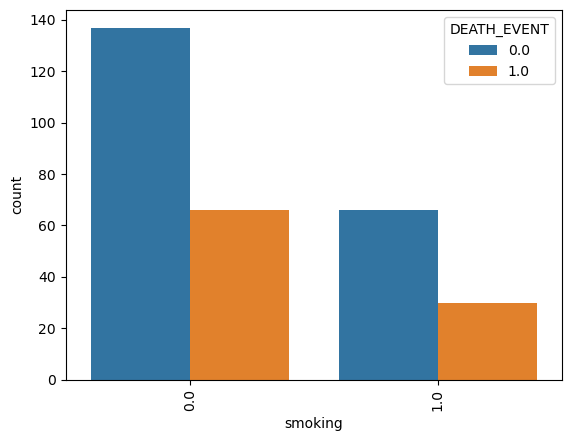

In [136]:
def died(param):
    g = sns.countplot(data=df_HeartFailure, x=param, hue='DEATH_EVENT')
    plt.xticks(rotation=90)
    plt.show()

attributes = ['smoking']

for attribute in attributes:
    died(attribute)

In [137]:
df_smoking = pd.DataFrame(df_HeartFailure.groupby(['smoking','DEATH_EVENT'])['DEATH_EVENT'].size().sort_values(ascending=False))
df_smoking.head()

DEATH_EVENT
smoking DEATH_EVENT             
0.0     0.0                  137
        1.0                   66
1.0     0.0                   66
        1.0                   30

## Data Preprocessing

### Korelasi

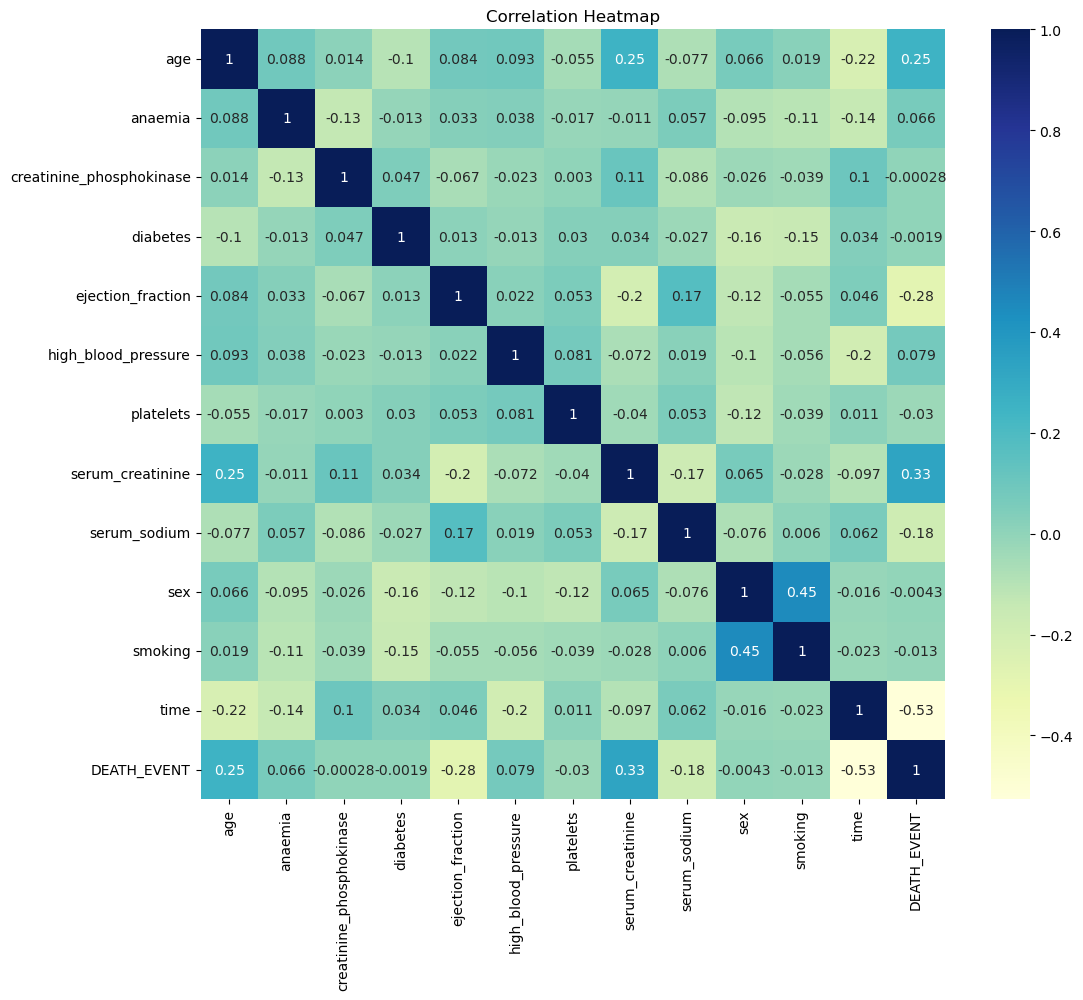

In [138]:
plt.figure(figsize=(12,10))
sns.heatmap(df_HeartFailure.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap");

### Menghapus Kolom Yang Tidak Digunakan

In [139]:
HF_Final = df_HeartFailure.drop(columns= ['time'])

HF_Final.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,1.0
1,55.0,0.0,216.5,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,1.1,137.0,0.0,0.0,1.0


### Scaling Data

In [140]:
scaler = StandardScaler()

In [141]:
data_X = HF_Final.drop(columns = ['DEATH_EVENT'])

X = scaler.fit_transform(data_X)
y = HF_Final["DEATH_EVENT"]

### Split Data

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [143]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 11)
(60, 11)
(239,)
(60,)


## Modelling

### Random Forest

In [144]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [145]:
y_pred_rf = model_rf.predict(x_test)

print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf)))

Accuracy of Random Forest classifier on test set: 0.80000


### Gradient Boosting

In [146]:
model_GB = ensemble.GradientBoostingClassifier(random_state=1)
model_GB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [147]:
y_pred_GB = model_GB.predict(x_test)

print('Accuracy of Gradient Boosting classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_GB))) 

Accuracy of Gradient Boosting classifier on test set: 0.78333


### Hyperparameter Tuning Random Forest

In [148]:
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,10),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [165]:
RF_rs = RandomizedSearchCV(model_rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
RF_rs_result = RF_rs.fit(x_train, y_train)

#Prediksi menggunakan model tuning
y_pred_rf_tunned = RF_rs_result.predict(x_test)

print('Accuracy of Random Forest classifier Tuning on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf_tunned)))  

Accuracy of Random Forest classifier Tuning on test set: 0.85000


In [166]:
print(RF_rs.best_params_)
print(classification_report(y_test, y_pred_rf_tunned))

{'criterion': 'entropy', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 210}
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91        46
         1.0       0.73      0.57      0.64        14

    accuracy                           0.85        60
   macro avg       0.80      0.75      0.77        60
weighted avg       0.84      0.85      0.84        60



### Hyperparameter Tuning Gradient Boosting

In [168]:
GBC_parameter_grid = {
         'n_estimators': np.arange(10,150,10), 
         'max_depth': range(1,20),
         'learning_rate': [0.001, 0.01, 0.1]
         }

GBC_rs = RandomizedSearchCV(model_GB, GBC_parameter_grid, scoring='roc_auc',n_jobs=4, cv=3)
GBC_rs_result = GBC_rs.fit(x_train,y_train)

#Prediksi menggunakan model tuning
y_pred_gb_tunned = GBC_rs_result.predict(x_test)

print('Accuracy of Gradient Boosting Tuning on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_gb_tunned)))  

Accuracy of Gradient Boosting Tuning on test set: 0.75000


In [181]:
print(GBC_rs.best_params_)
print(classification_report(y_test, y_pred_gb_tunned))

{'n_estimators': 70, 'max_depth': 2, 'learning_rate': 0.1}
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.85        46
         1.0       0.44      0.29      0.35        14

    accuracy                           0.75        60
   macro avg       0.62      0.59      0.60        60
weighted avg       0.72      0.75      0.73        60



## Evaluasi Model 

In [182]:
rf = metrics.accuracy_score(y_test, y_pred_rf)
gb = metrics.accuracy_score(y_test, y_pred_GB)
rfc_tunned = metrics.accuracy_score(y_test, y_pred_rf_tunned)
gb_tunned = metrics.accuracy_score(y_test, y_pred_gb_tunned)

In [183]:
# Create Accuracy Comparison Table 
compare = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting', 'Random Forest Tunned', 'Gradient Boosting Tunned'], 
                        'Accuracy': [rf*100, gb*100, rfc_tunned*100, gb_tunned*100]})

# Create Accuracy Comparison Table
compare_sorted = compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').set_table_styles([{'selector': 'thead', 'props': [('background', '#606062')]}])

# Set font family for better appearance
compare_sorted.set_properties(**{'font-family': 'Segoe UI'})

# Display the styled table
compare_sorted

,Model,Accuracy
2,Random Forest Tunned,85.000000
0,Random Forest,80.000000
1,Gradient Boosting,78.333333
3,Gradient Boosting Tunned,75.000000


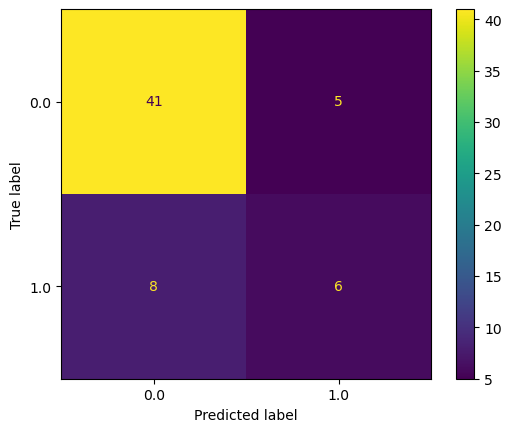

In [184]:
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)

# Example: Using plot_confusion_matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

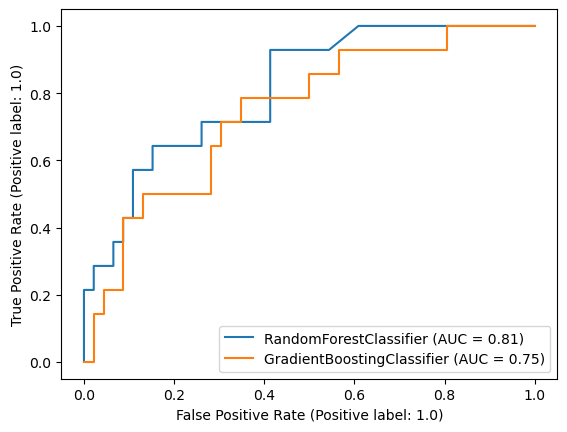

In [185]:
from sklearn.metrics import RocCurveDisplay

fig = plt.figure()
ax = fig.gca()

rfc_disp = RocCurveDisplay.from_estimator(model_rf, x_test, y_test, ax=ax)
gbc_disp = RocCurveDisplay.from_estimator(model_GB, x_test, y_test, ax=ax)

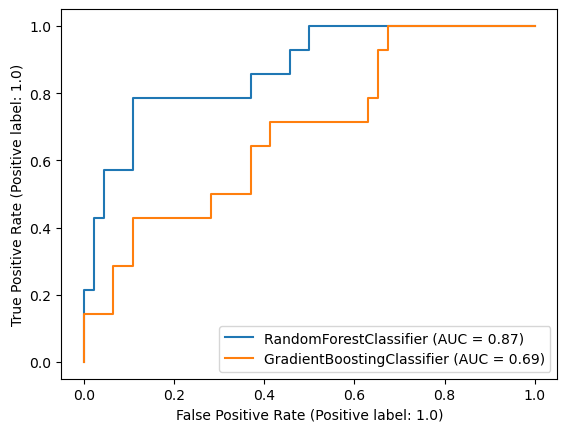

In [189]:
#tuning parameter
fig = plt.figure()
ax = fig.gca()

RF_disp = RocCurveDisplay.from_estimator(RF_rs.best_estimator_, x_test, y_test, ax=ax)
GB_disp = RocCurveDisplay.from_estimator(GBC_rs.best_estimator_, x_test, y_test, ax=ax)

### Model Random Forest dan Gradient Boosting

In [190]:
model_rf_tunned = RandomForestClassifier(criterion='entropy', max_depth=None, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=60)
model_rf_tunned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=4, min_samples_split=8,
                       n_estimators=60)

In [191]:
# Feature Important
feature_imp = pd.Series(model_rf_tunned.feature_importances_, index=data_X.columns).sort_values(ascending=False)

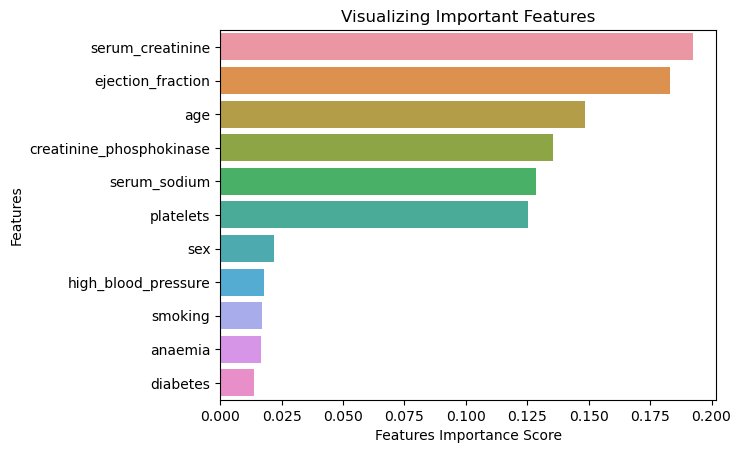

In [192]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

### Prediksi 

In [193]:
HF_Final

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,1.0
1,55.0,0.0,216.5,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,1.1,137.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,0.0
295,55.0,0.0,216.5,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,0.0
296,45.0,0.0,216.5,1.0,60.0,0.0,258000.00,0.8,138.0,0.0,0.0,0.0
297,45.0,0.0,216.5,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,0.0


In [162]:
X_pred = [60, 0, 216, 1, 38, 1, 162000, 1.6, 130, 1, 0]

In [163]:
y_pred_rf_tunned = RF_rs_result.predict([X_pred])

In [164]:
print(y_pred_rf_tunned)

if (y_pred_rf_tunned == 1):
    print("Pasien diprediksi Meninggal")
else:
    print("Pasien diprediksi Tidak Meninggal")

[1.]
Pasien diprediksi Meninggal
